In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import plot, draw, show
from scipy.linalg import lu
import scipy.linalg as la
import random
import simpy
import math
import seaborn as sns
import imageio

In [2]:
plt.rcParams['figure.figsize'] = [15, 5]

def prettyfie(ax, x, y, title, legendYN='Yes'):

    # Remove borders
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(alpha=0.25)

    # Remove unnecessary ticks
    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,
        labelbottom=True,
        left=False,
        right=False,
        labelleft=True)

    if legendYN == 'Yes':
        # Create legend and grid
        ax.legend(framealpha=1, shadow=True)
        ax.legend()

    # Set labels and title
    ax.set_xlabel(x, fontsize=14)
    ax.set_ylabel(y, fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

def plotpretify(ax, maxx, minx=0, miny=None, maxy=None,
                Grid=True, LB=True, LL=True):
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=True,
        left=False,
        right=False,
        labelleft=True)
#     ax.grid(True)
    
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

sns.set()

In [3]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)  # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name, index=index)
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name, index=index, size=size)
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name, index=str(index or '?'))

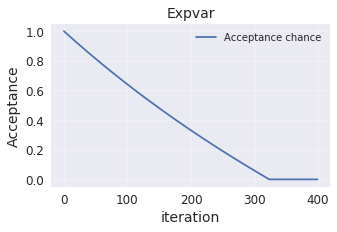

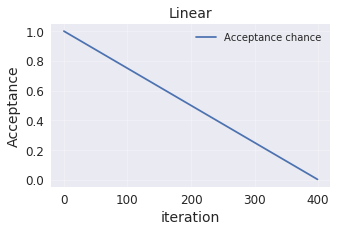

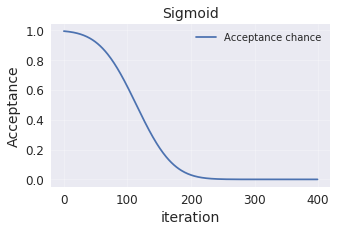

/home/lennart/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: RuntimeWarning: overflow encountered in exp


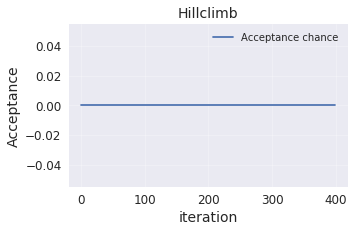

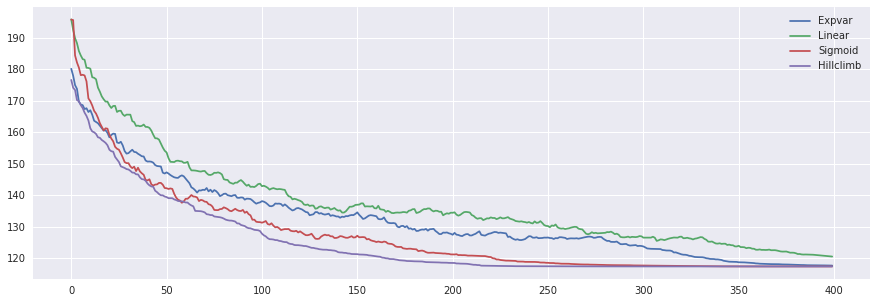

117.65096655093878
120.5176790588891
117.37211463747967
117.3712185630259


[None, None, None, None]

In [20]:
def plot(coordList):
    plt.rcParams['figure.figsize'] = [10, 10]
    sns.set()
    sns.set_style("dark")
    fig = plt.figure()
    ax = plt.subplot(111)
    colors = list(range(len(coordList)))
    ax.scatter(coordList[:, 0], coordList[:, 1], c=colors, cmap='Dark2')
    circle1 = plt.Circle((0, 0), radius, alpha=0.2, color="olive")
    ax.add_artist(circle1)
    plotpretify(
        ax,
        1.1,
        minx=-1.1,
        miny=-1.1,
        maxy=1.1,
        Grid=False,
        LL=False,
        LB=False)


def getScheme_data(iters, plot="No", scheme="Sigmoid", markovChain=1):

    answer = []

    if scheme == "Sigmoid":
        linspace = np.linspace(0, 7, iters)
        for x in linspace:
            answer.append(0.5 +
                          math.erf((math.sqrt(math.pi) / 2) * (x - 2)) * -0.5)
    elif scheme == "Exp":
        for x in range(iters):
            answer.append(np.exp(-x / (iters / 10)))
    elif scheme == "Expvar":
        for x in range(iters):
            answer.append(
                max(
                    np.exp(-x / iters) - ((1.5 * x) / iters) * (1 / math.e),
                    0))
    elif scheme == "Expvar2":
        for x in range(iters):
            answer.append(max(np.exp(-x / iters) - 1.1 * (1 / math.e), 0))
    elif scheme == "Hillclimb":
        for x in range(iters):
            answer.append(0)
    elif scheme == "Binary":
        for x in range(iters):
            if x < iters / 2:
                answer.append(1)
            else:
                answer.append(0)
    elif scheme == "Linear":
        for x in range(iters):
            answer.append(1 - (x / iters))

    if plot == "Yes":
        plotanswer = np.repeat(answer, markovChain)
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))
        ax.plot(plotanswer, label="Acceptance chance")
        ax.legend()
        prettyfie(ax, "iteration", "Acceptance", scheme, legendYN="Yes")
        plt.show()
    return np.array(answer)



def incircle(crds, r=1):
    return np.power(crds[0], 2) + np.power(crds[1], 2) < r


def spawn(r=1):
    x = random.uniform(-r, r)
    limits = [-np.sqrt(r**2 - x**2), np.sqrt(r**2 - x**2)]
    y = random.uniform(limits[0], limits[1])
    return [x, y]

# Good score when somewhere < 2
def checkScore(coord):
    totalDist = 0
    for i in range(len(coord)):
        for j in range(i, len(coord)):
            if i != j:
                totalDist += 1 / abs(
                    math.hypot(coord[j][0] - coord[i][0],
                               coord[j][1] - coord[i][1]))
    return totalDist

def move(k, coord, temp, rate):
    F = np.array([0.0, 0.0])
    velocity = np.zeros(2, float)
    for l in coord:
        if any(l != k):
            r = np.array(k) - np.array(l)
            F1 = (r / (np.linalg.norm(r)**3) * rate)
            F += F1
    newPoint = k + F
    xr = random.uniform(-1, 1) * (1 / 50)#(1 / 50)
    yr = random.uniform(-1, 1) * (1 / 50)#(1 / 50)
#     print(f"xr = {xr}")
    newPoint += [xr, yr]
    if not incircle(newPoint, radius):
        newPoint = newPoint / la.norm(newPoint)
    return newPoint, F

def submove(k, i, coord, temp, rate, score):
    global coordListList
    cT, favo = move(k, coord, temp, rate)
    coordTemp = np.copy(coord)
    coordTemp[i] = cT
    coordListList.append(coordTemp)
#     print(f"score = {score}")
#     print(f"scoretemp = {checkScore(coordTemp)}")
#     print("-----")
    scoreTemp = checkScore(coordTemp)
    if temp > 0:
        chance = np.exp(-(scoreTemp - score) / temp)
    else:
        chance = 0
    if score > scoreTemp:
        return np.array(coordTemp), favo
    elif chance > random.random():
        return np.array(coordTemp), favo
    else:
        return coord, favo


def changeCoord(coord, temp, rate):
    score = checkScore(coord)
    fav = []
    for i, k in enumerate(coord):
        coord, favo = submove(k, i, coord, temp, rate, score)
        fav.append(favo)
    return coord


def start_sim(radius,
              pointsNum,
              iterations,
              rate,
              scheme,
              markovChain,
              plotScheme="No"):
    coordList = []
    global coordListList
    schemeData = np.repeat(
        getScheme_data(iterations, plot=plotScheme, scheme=scheme),
        markovChain)
    iterations = iterations * markovChain

    for i in range(pointsNum):
        coordList.append(spawn(radius))
    # 2 points:
#     coordList = [[-1,0], [-0.5,0]]
    # coordList = [[-1,0], [-0.5,0.3]]
#     coordList = [[0.2,0.2], [-0.5,0.3]]

    # 3 points:
#     coordList = [[0.2,0.2], [-0.5,0.3], [-0.1, -0.2]]
    coordList = np.array(coordList)

#     coordListList = [coordList]
    coordListList = []
    coordListList.append(coordList)
    checklist = []
    for i in log_progress(range(iterations), every=1):
        temp = schemeData[i]
        coordList = changeCoord(coordList, temp, rate)
        coordListList.append(coordList)
        checklist.append(checkScore(coordList))

    return coordList, coordListList, checklist

coordListList = []

radius = 1
pointsNum = 16
iterations = 1500
rate = math.pow(10, -4)
# schemes = ["Sigmoid", "Exp", "Expvar", "Hillclimb"]
schemes = ["Expvar", "Linear", "Sigmoid", "Hillclimb"]
# schemes = ["Expvar", "Sigmoid"]
# schemes = ["Hillclimb", "Expvar", "Expvar", "Exp"]
scheme = "Sigmoid"
checks = []
coordListListList = []

for scheme in schemes:
    coordList, coordListList, checklist = start_sim(
        radius, pointsNum, iterations, rate, scheme, 1, plotScheme="Yes")
    checks.append(checklist)
    coordListListList.append(coordListList)

[plt.plot(check, label=schemes[i]) for i, check in enumerate(checks)]
plt.legend()
plt.show()
[print(check[-1]) for check in checks]

In [ ]:
def plot(coordList):
    plt.rcParams['figure.figsize'] = [10, 10]
    sns.set()
    sns.set_style("white")
    fig = plt.figure()
    ax = plt.subplot(111)
    colors = list(range(len(coordList)))
    ax.scatter(coordList[:, 0], coordList[:, 1], c=colors, cmap='Dark2')
    circle1 = plt.Circle((0, 0), radius, alpha=0.2, color="olive")
    ax.add_artist(circle1)
    plotpretify(
        ax,
        1.1,
        minx=-1.1,
        miny=-1.1,
        maxy=1.1,
        Grid=False,
        LL=False,
        LB=False)
    return fig, ax

Expvar
Linear
Sigmoid
Hillclimb


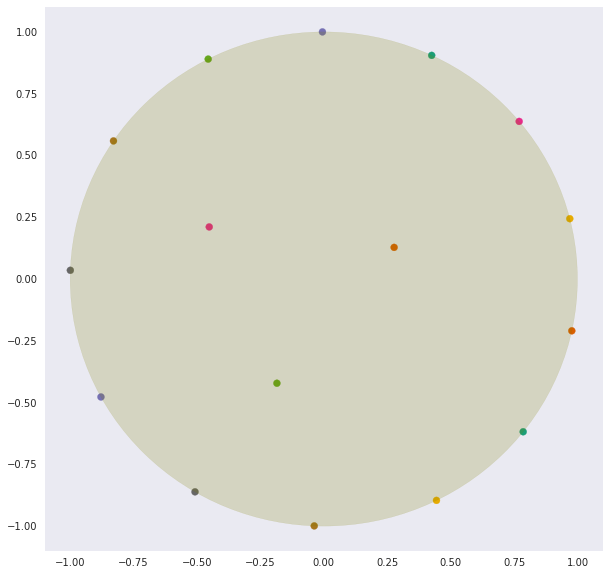

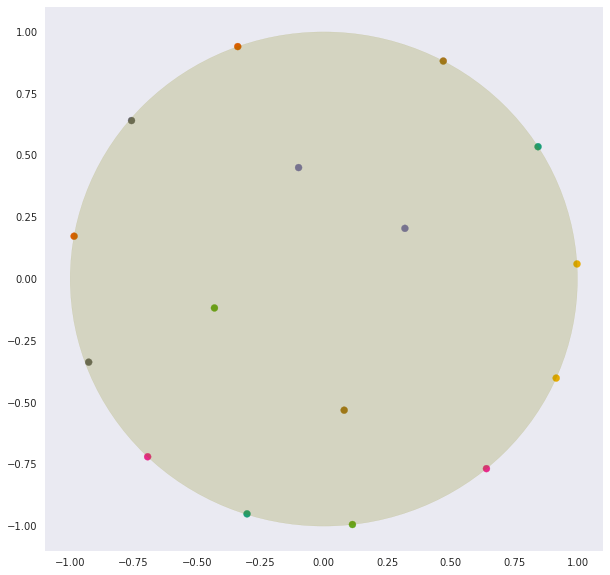

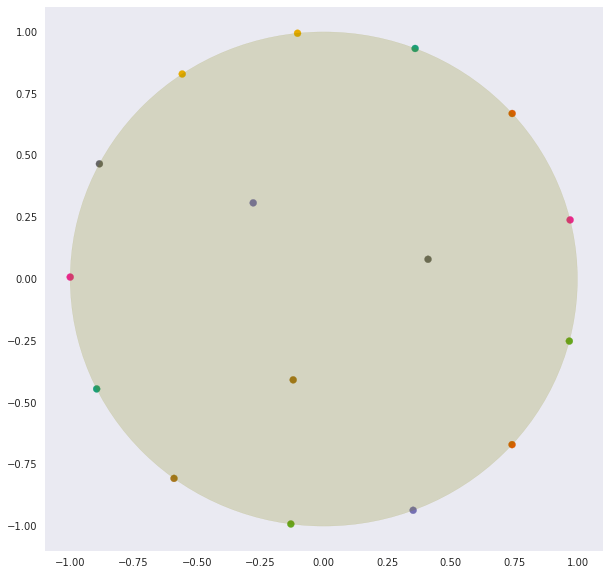

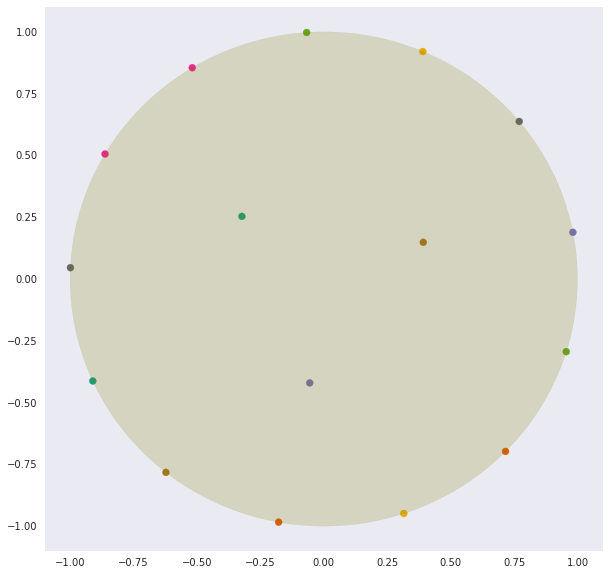

In [21]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

for j in range(len(coordListListList)):
    print(schemes[j])
    def showPlot(i=0):
        plot(coordListListList[j][i])

    # for cll in coordListListList:
#     y = interactive(showPlot, i=(0, len(coordListListList[j]) - 1, 1))
#     y = interactive(showPlot, i=range(len(coordListListList[j])))
    plot(coordListListList[j][-1])
#     display(y)

/home/lennart/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

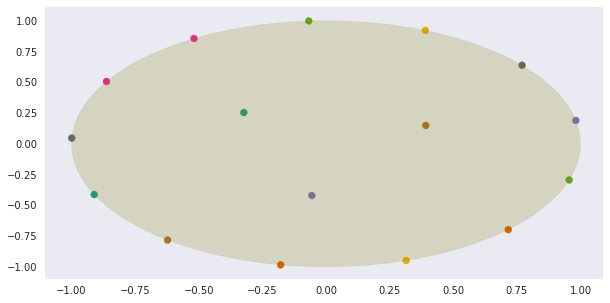

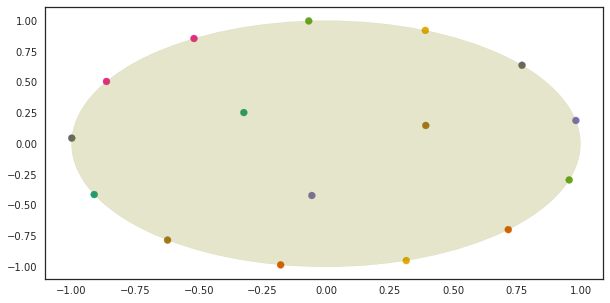

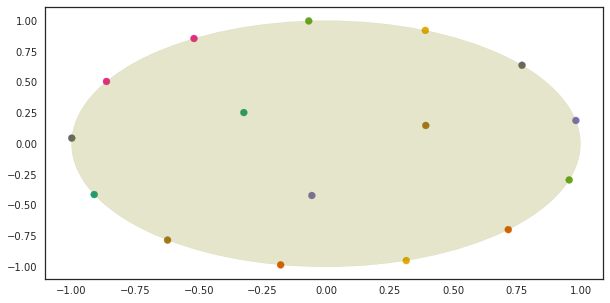

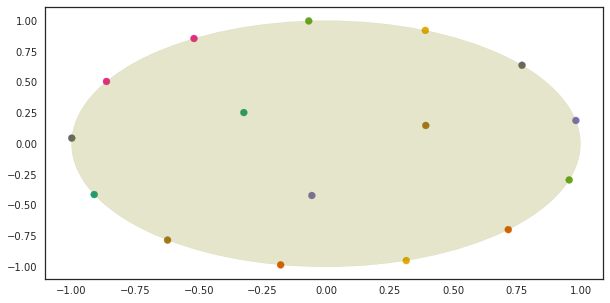

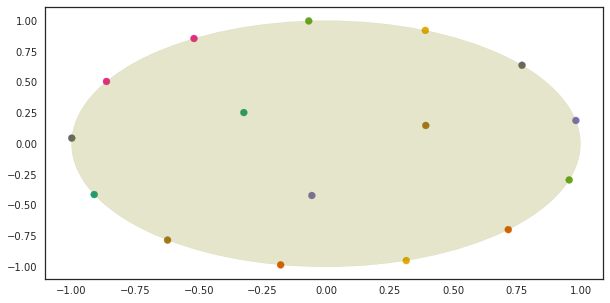

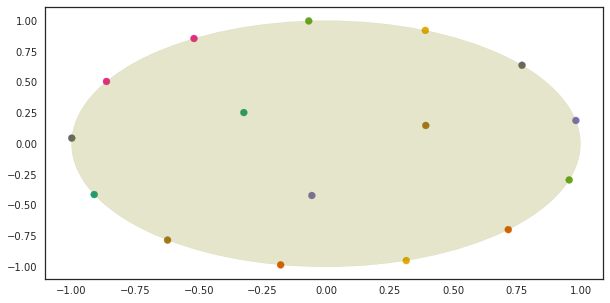

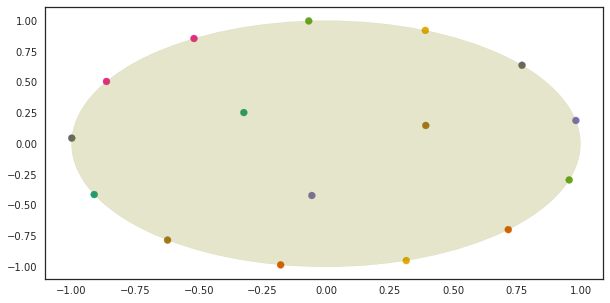

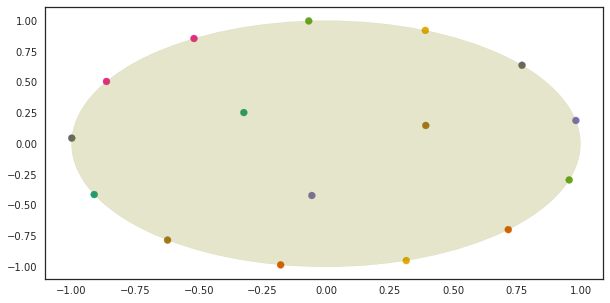

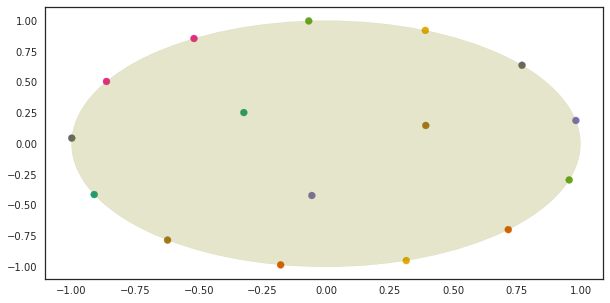

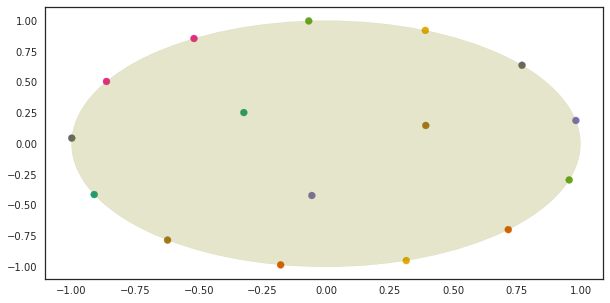

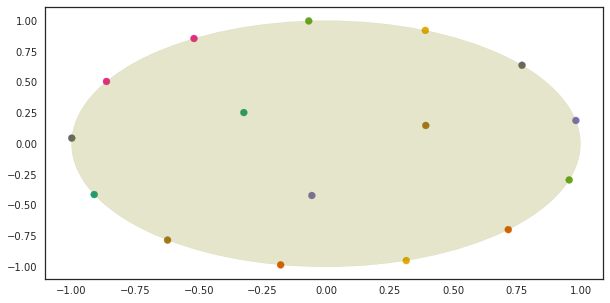

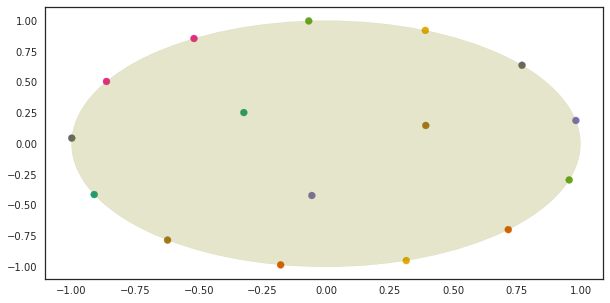

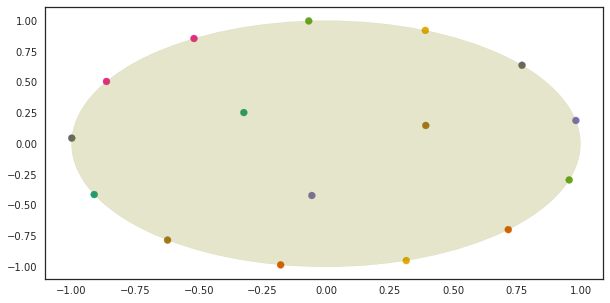

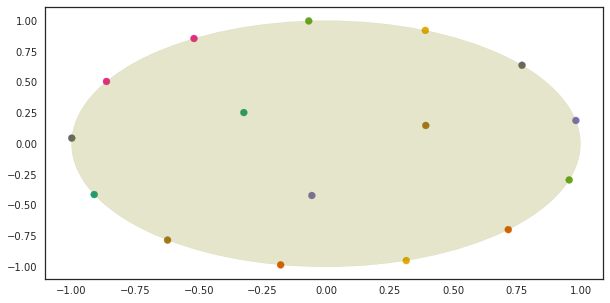

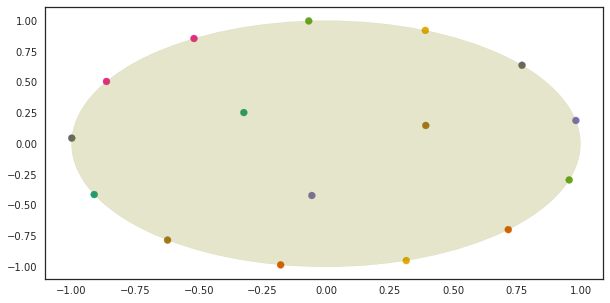

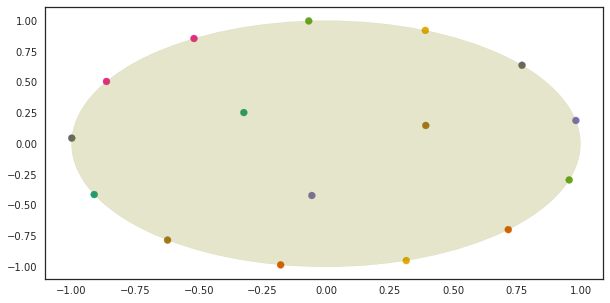

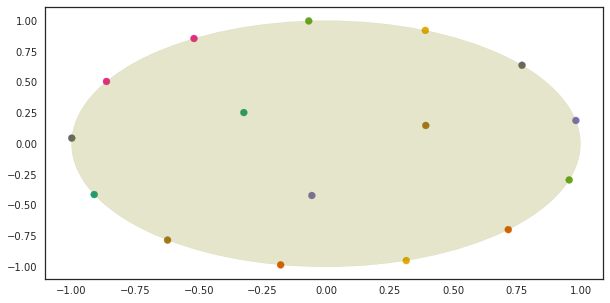

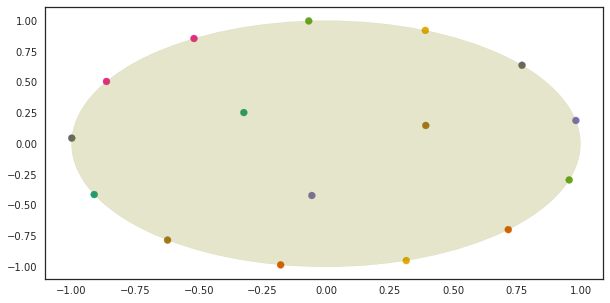

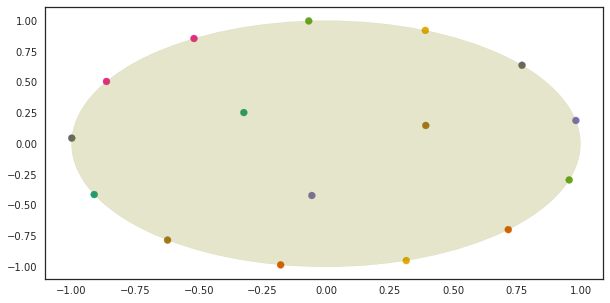

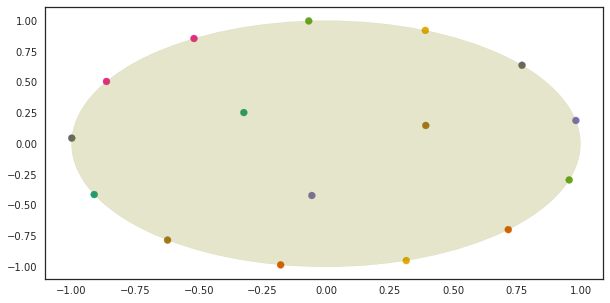

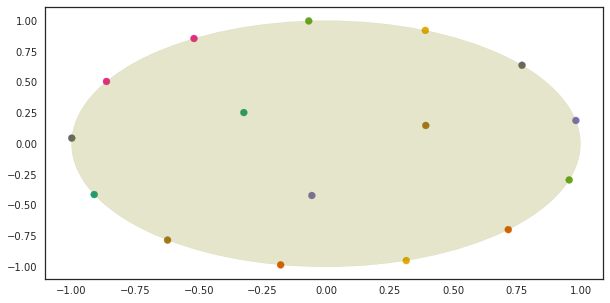

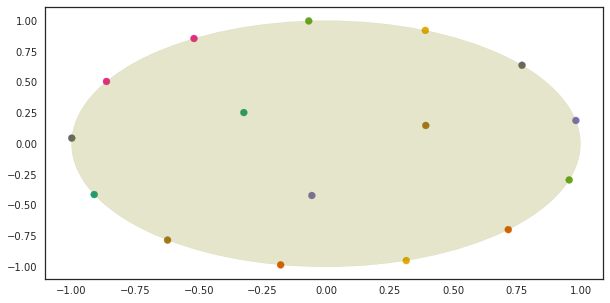

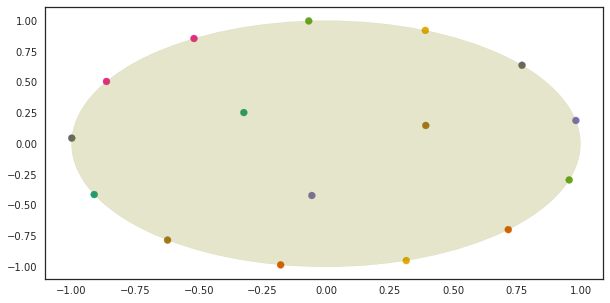

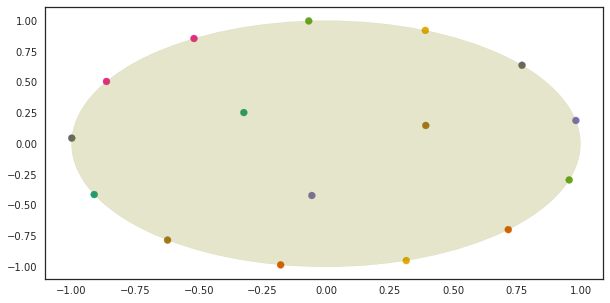

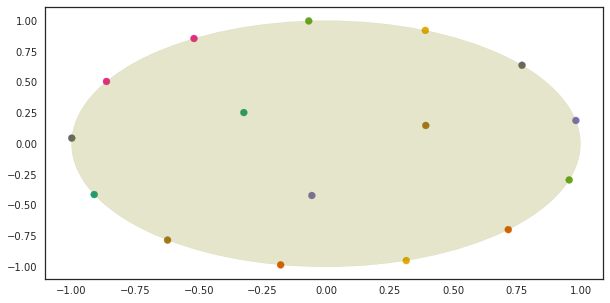

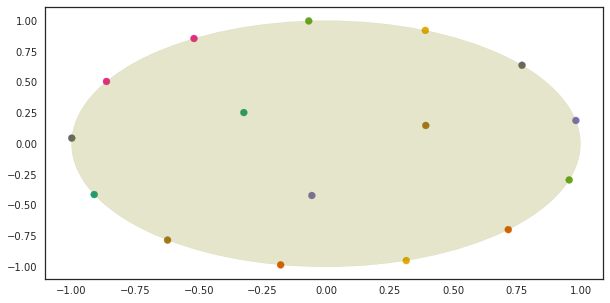

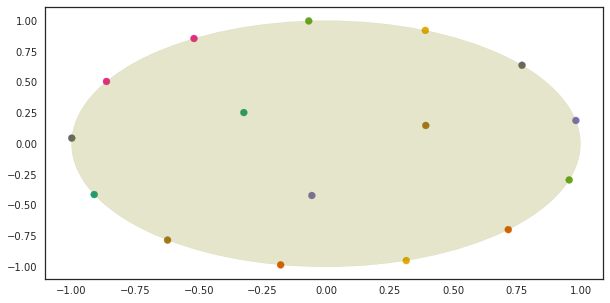

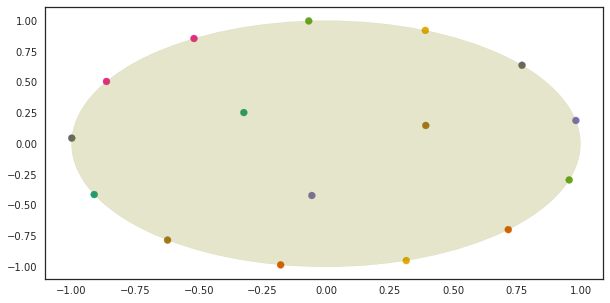

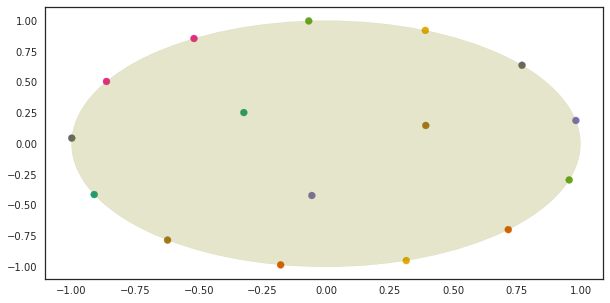

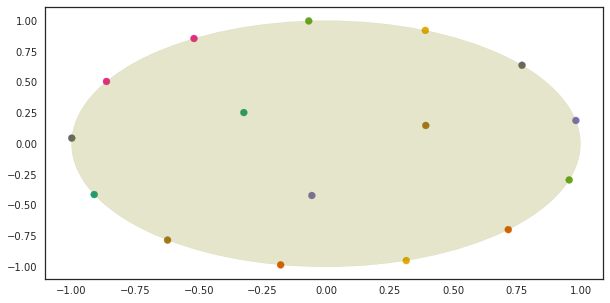

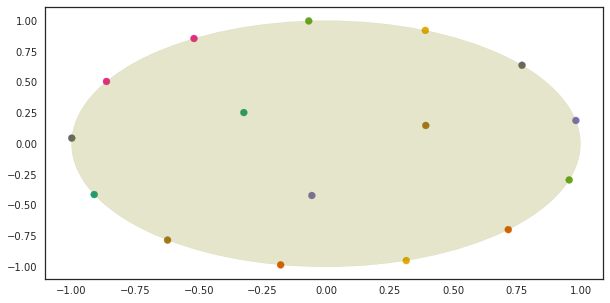

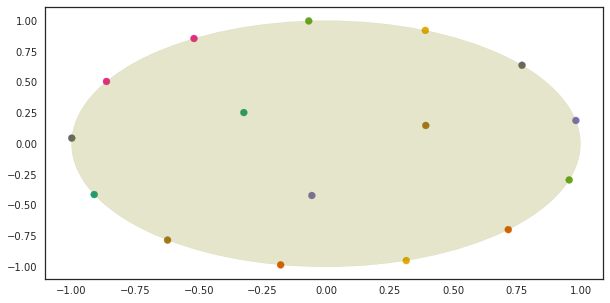

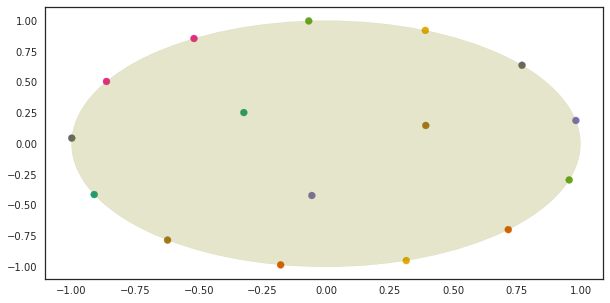

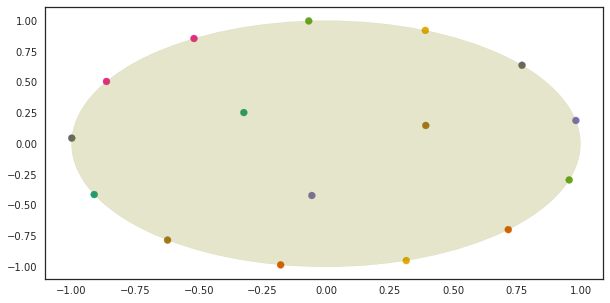

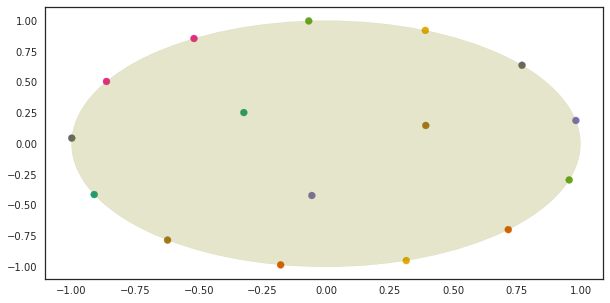

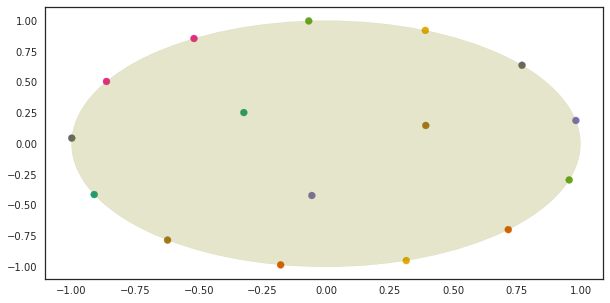

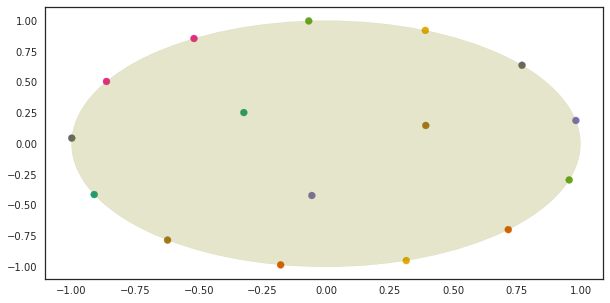

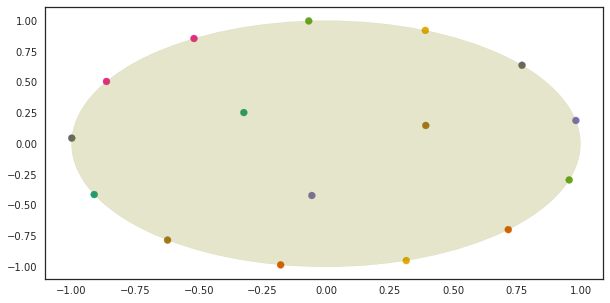

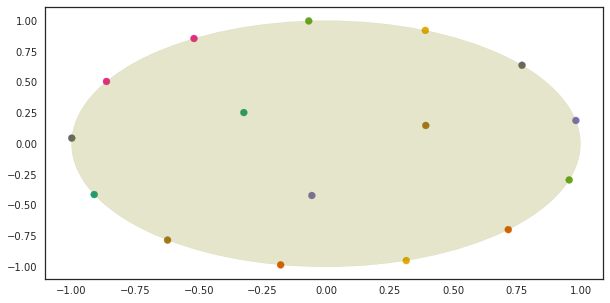

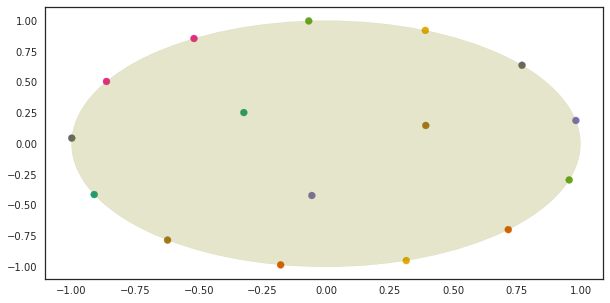

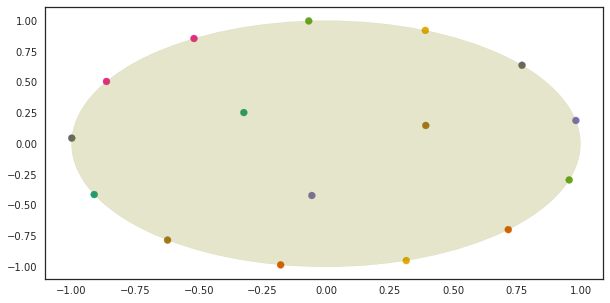

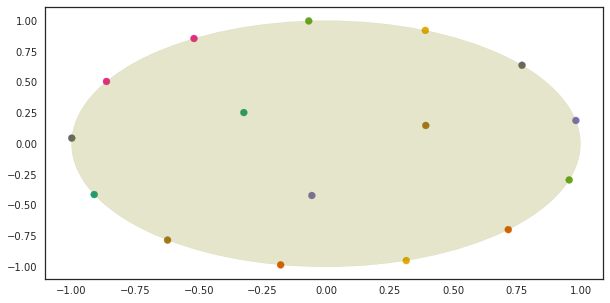

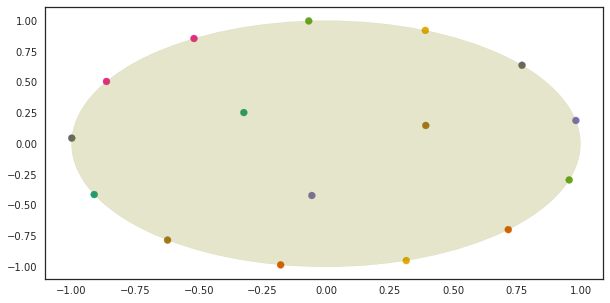

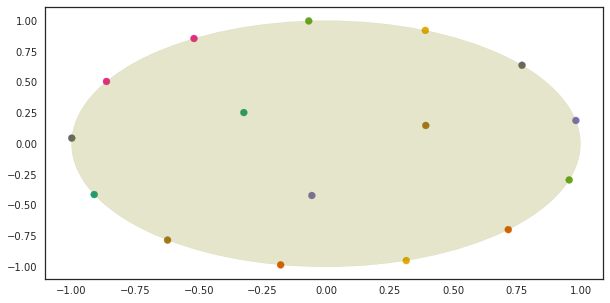

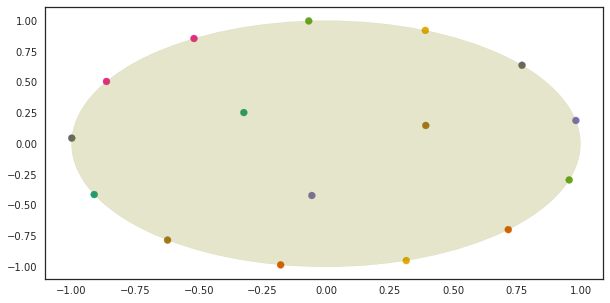

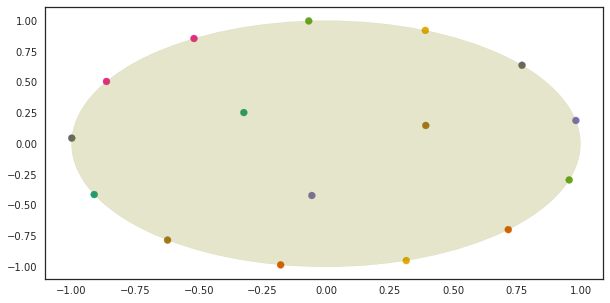

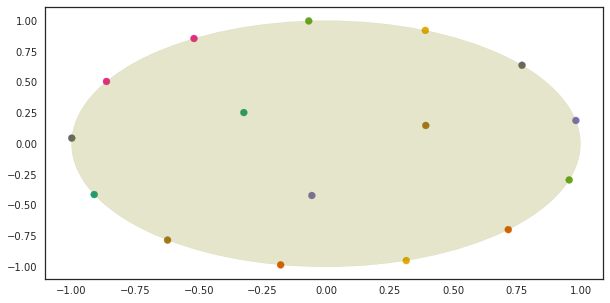

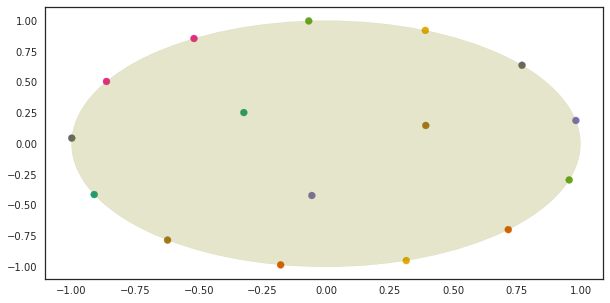

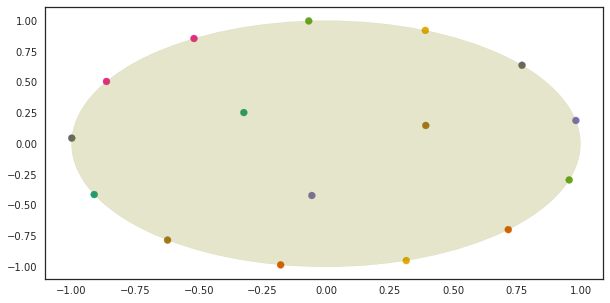

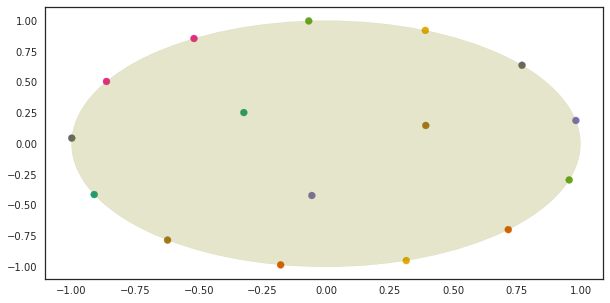

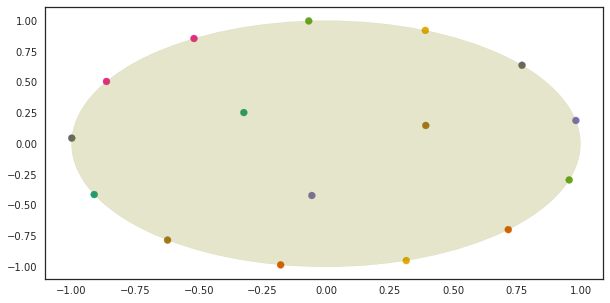

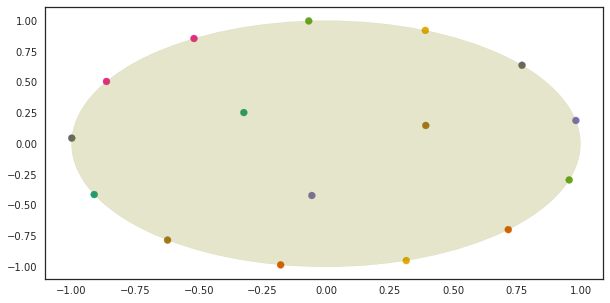

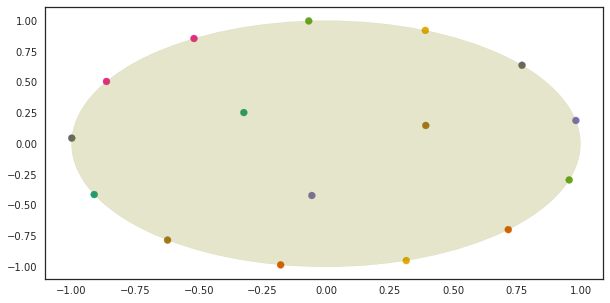

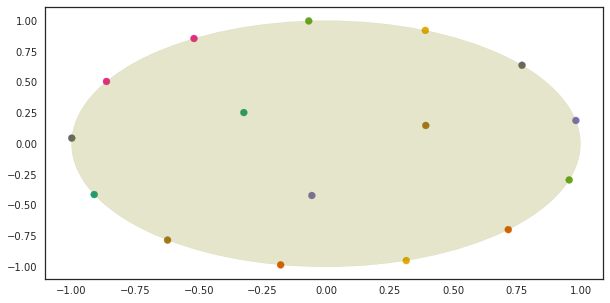

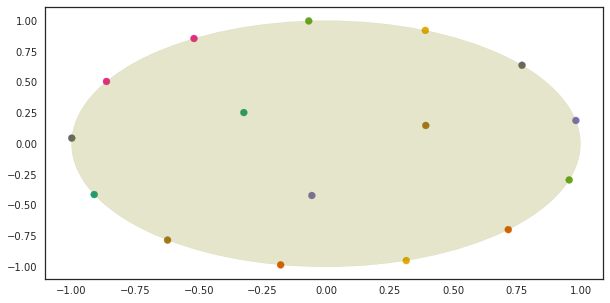

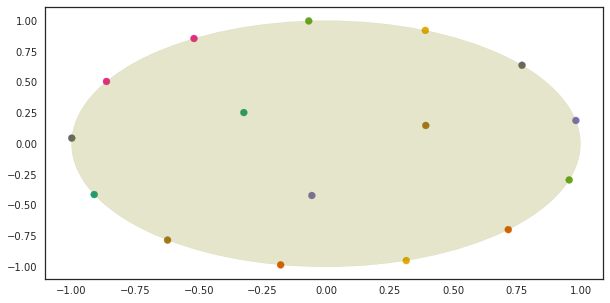

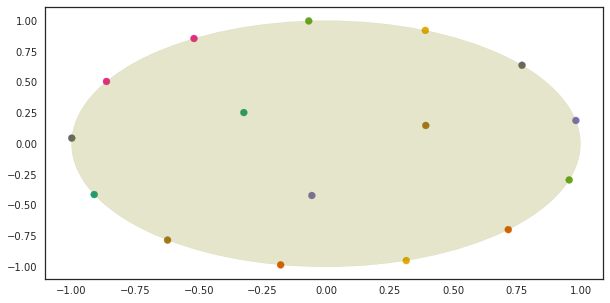

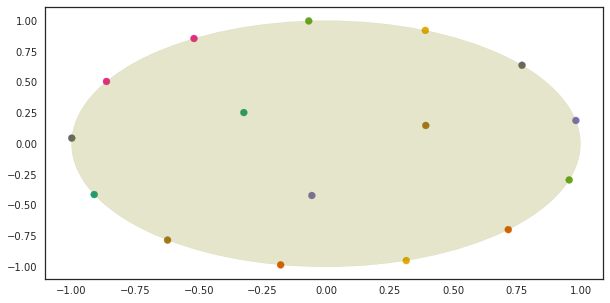

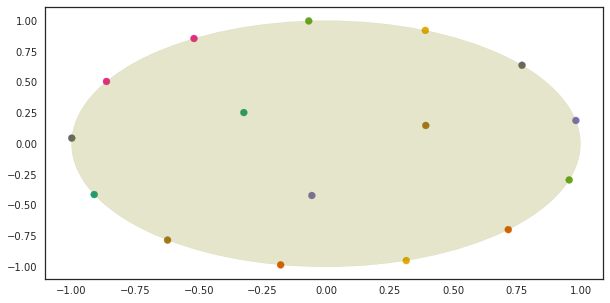

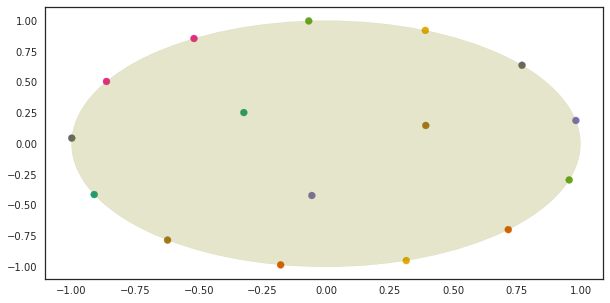

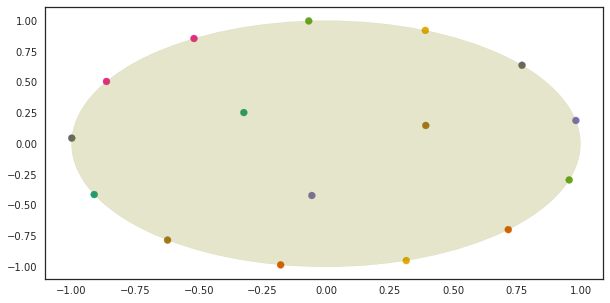

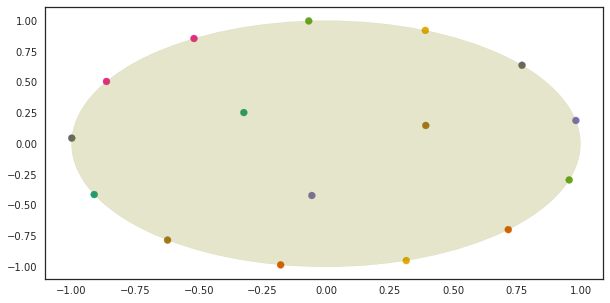

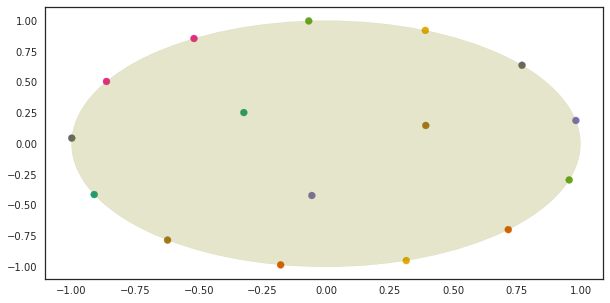

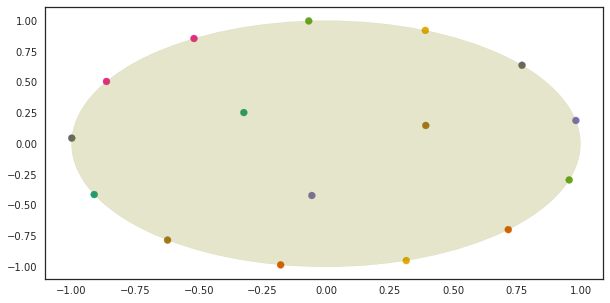

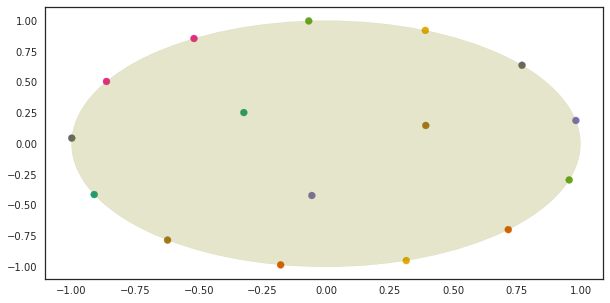

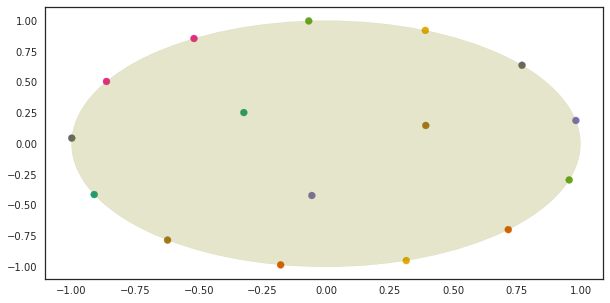

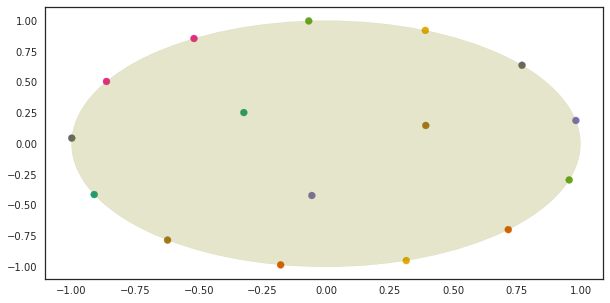

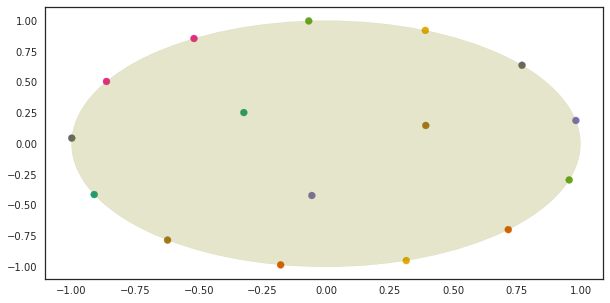

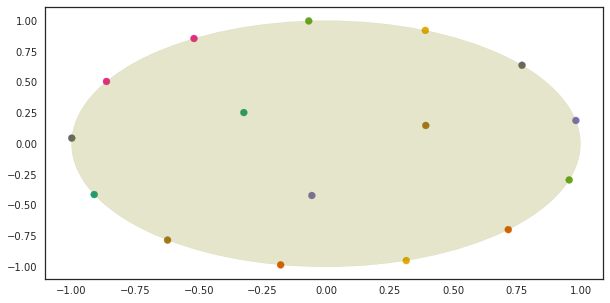

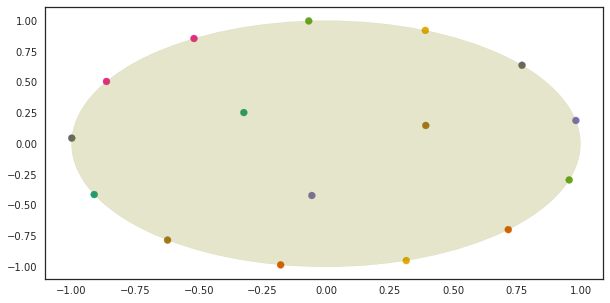

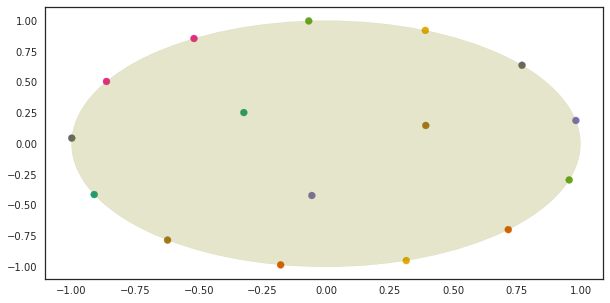

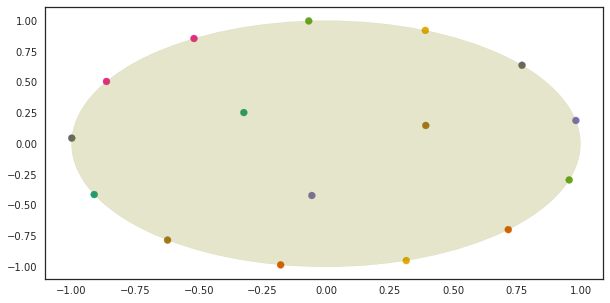

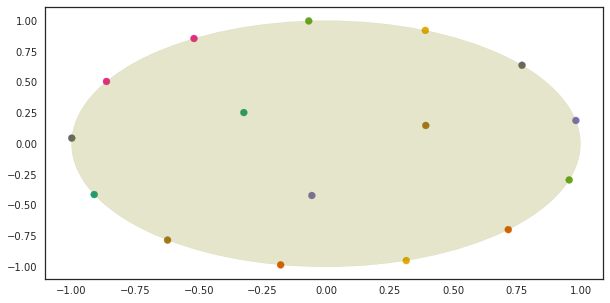

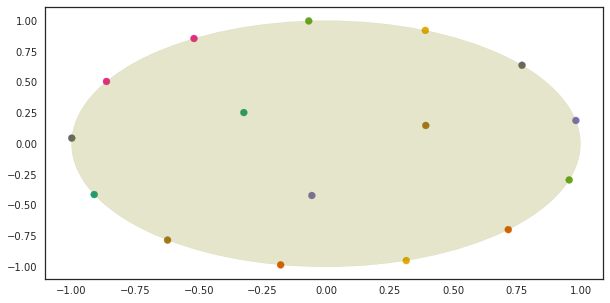

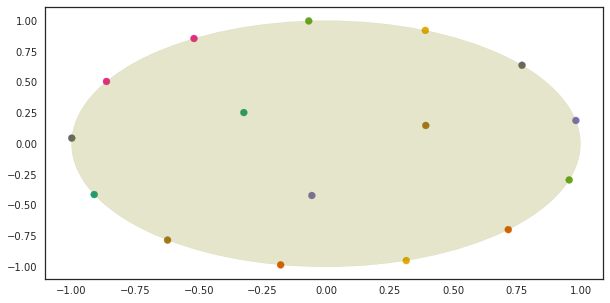

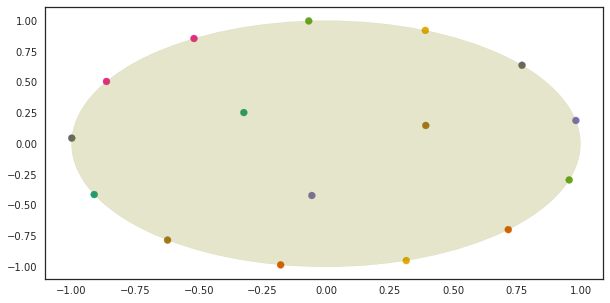

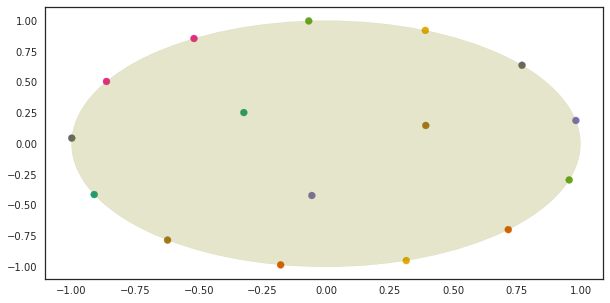

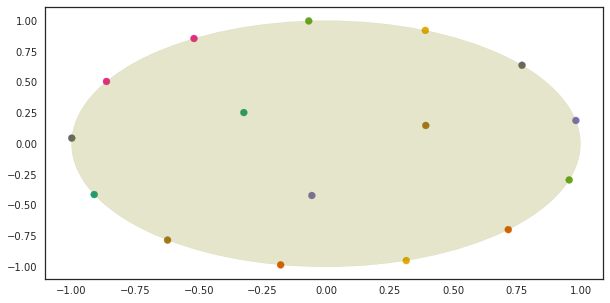

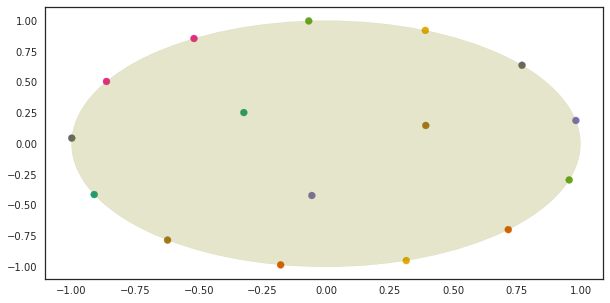

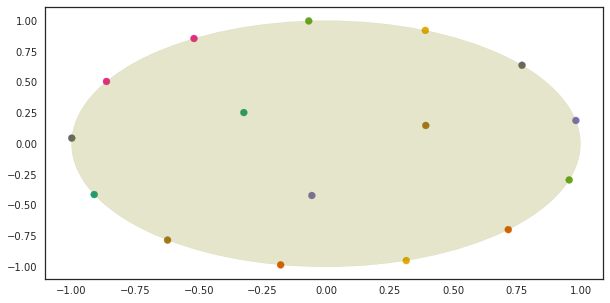

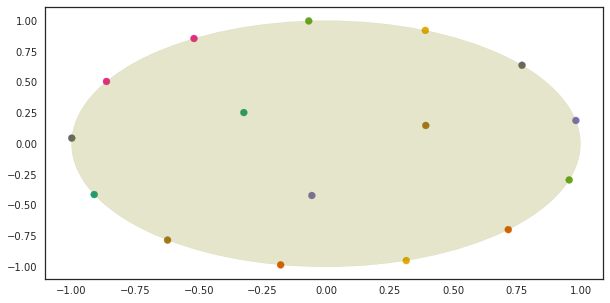

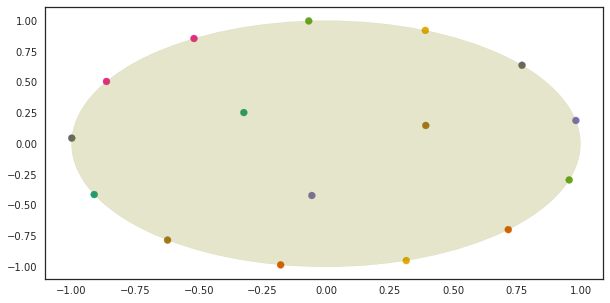

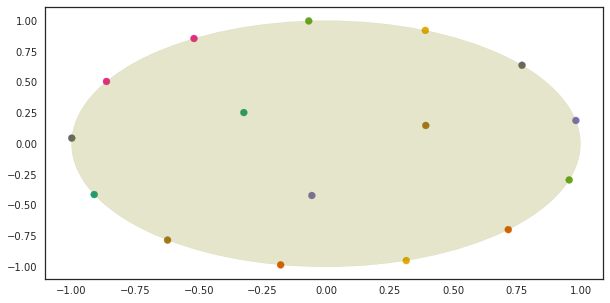

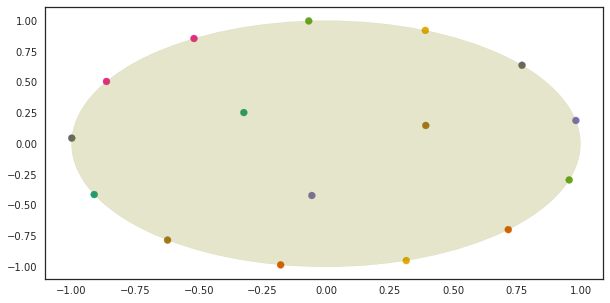

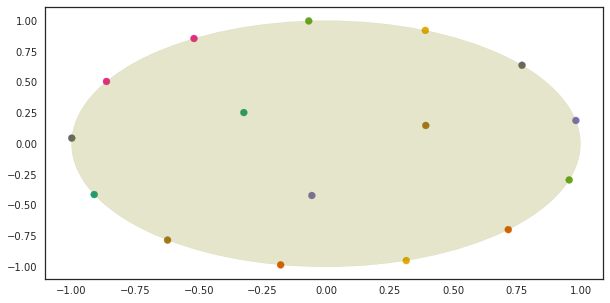

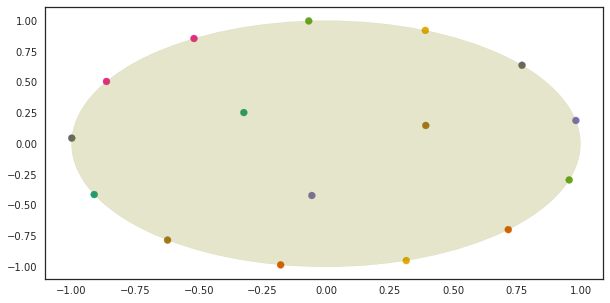

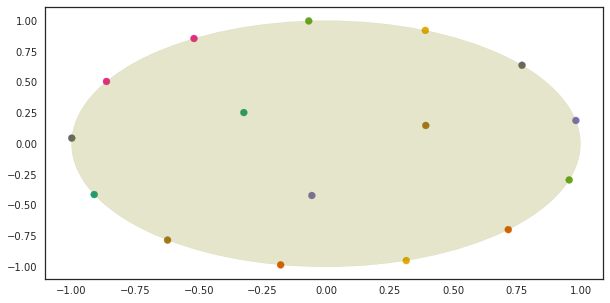

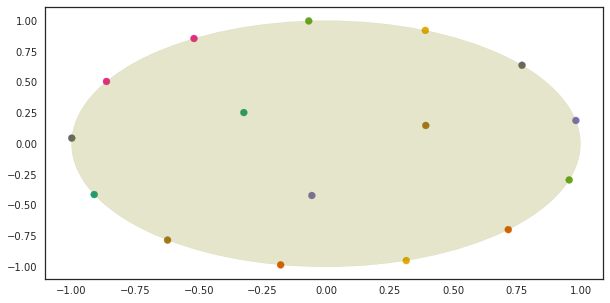

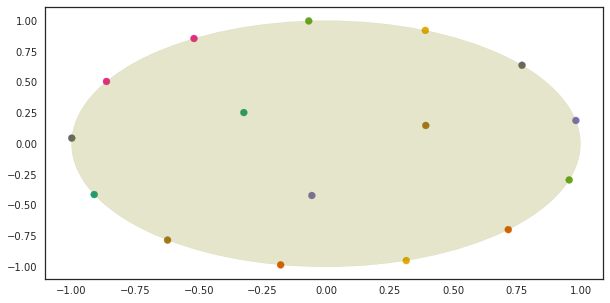

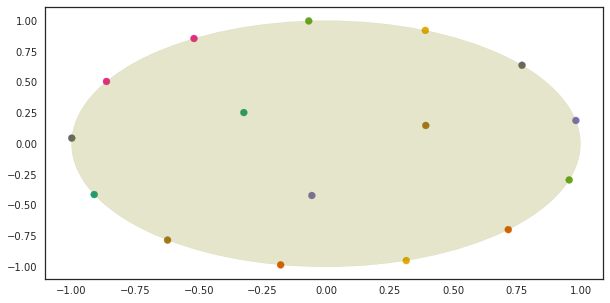

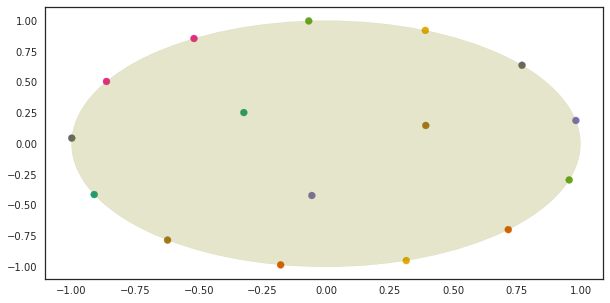

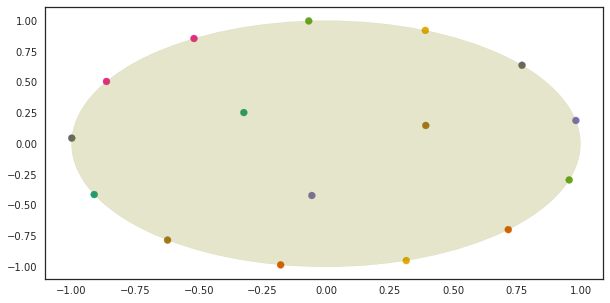

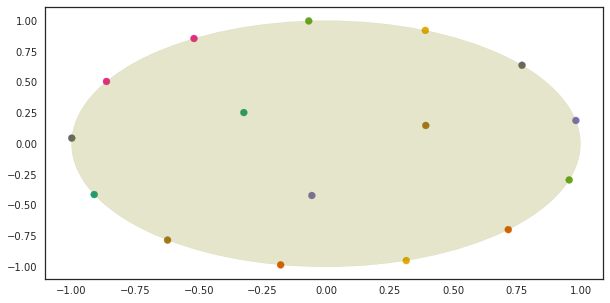

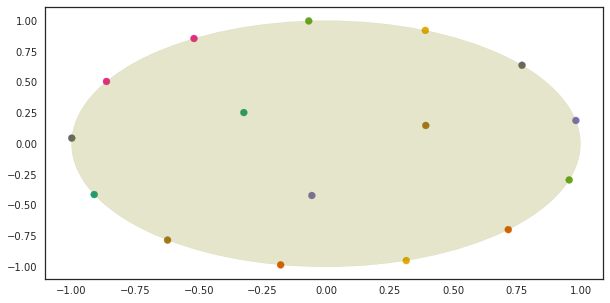

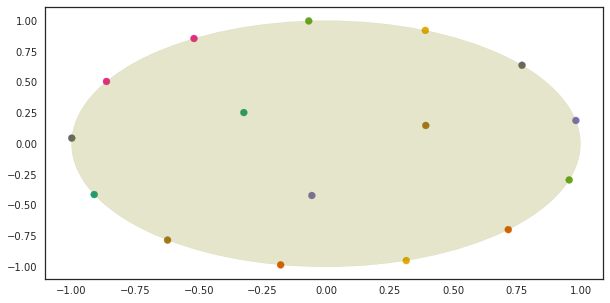

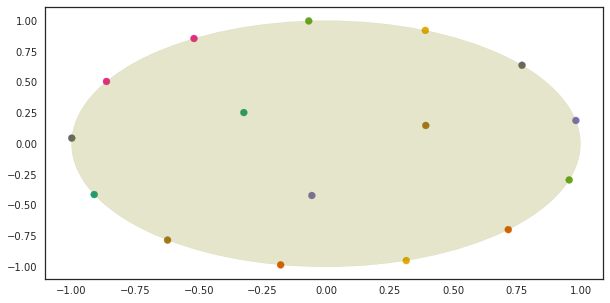

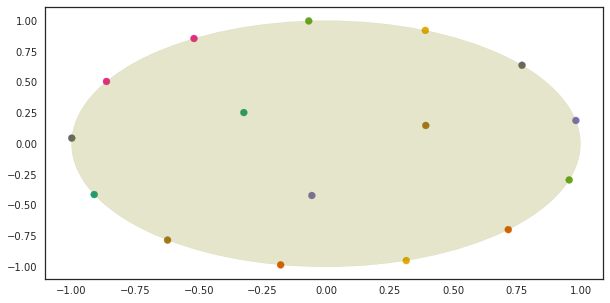

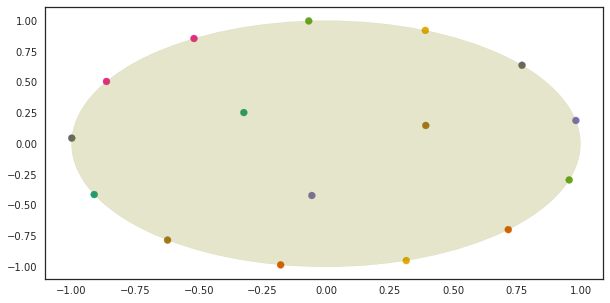

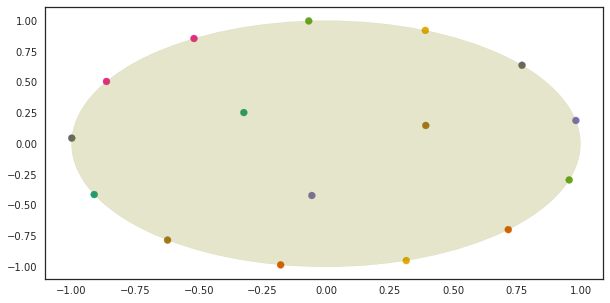

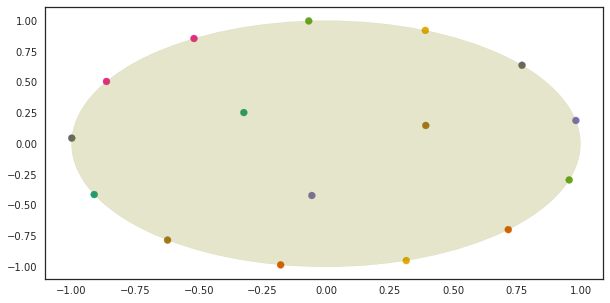

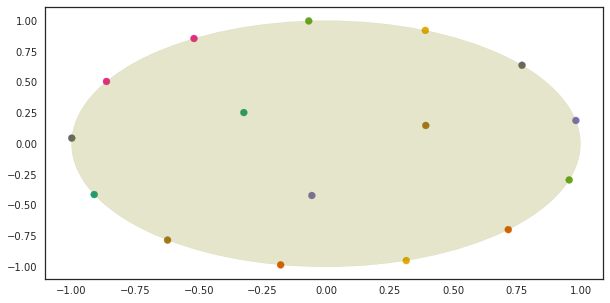

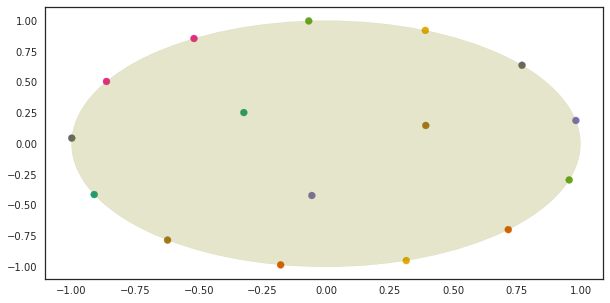

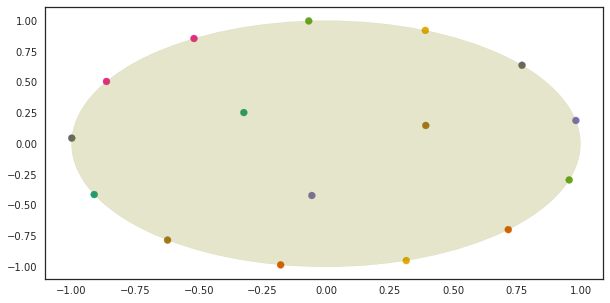

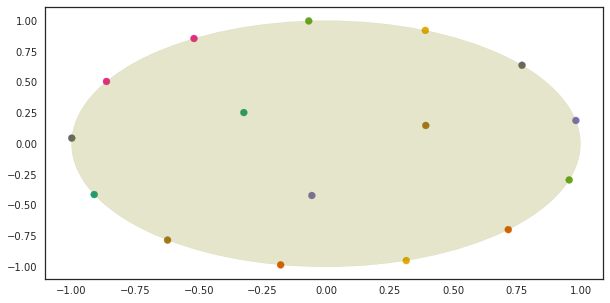

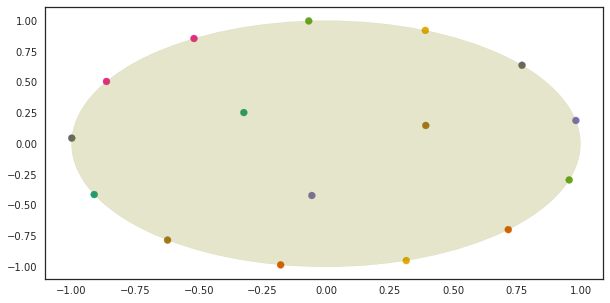

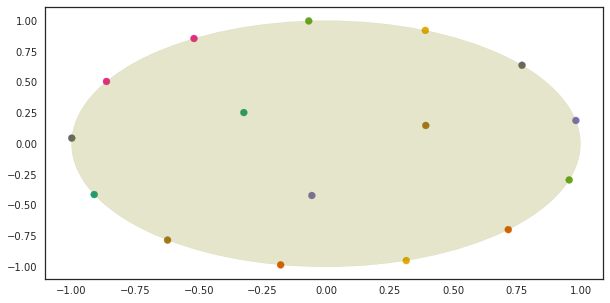

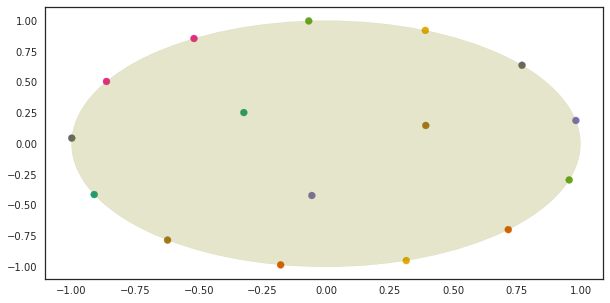

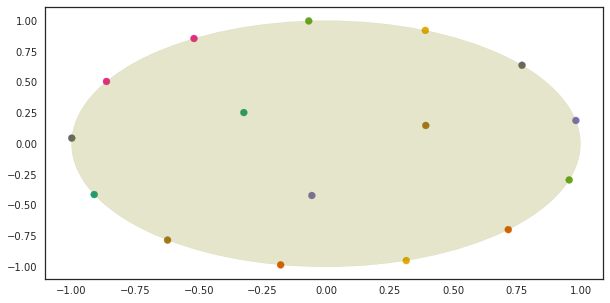

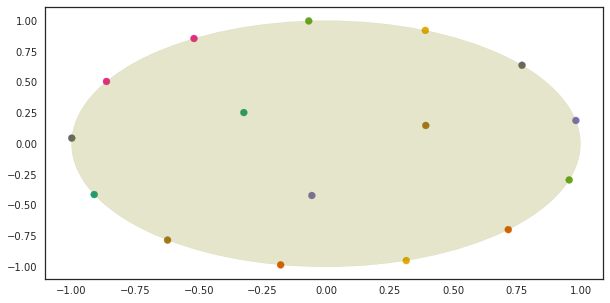

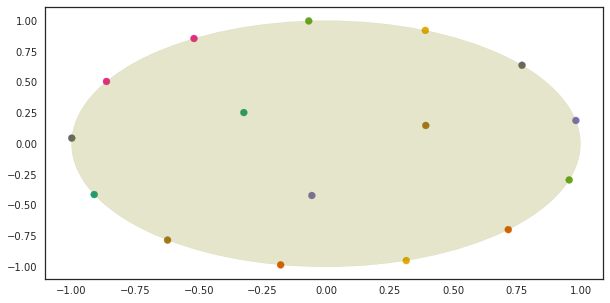

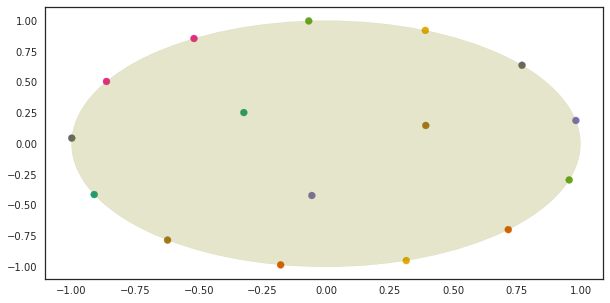

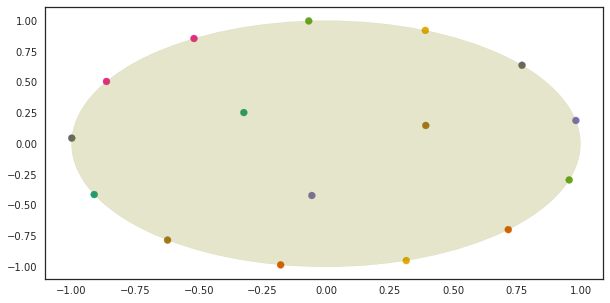

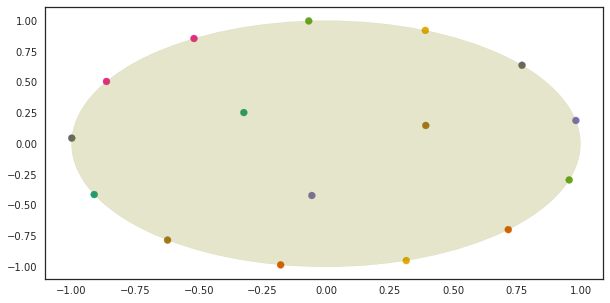

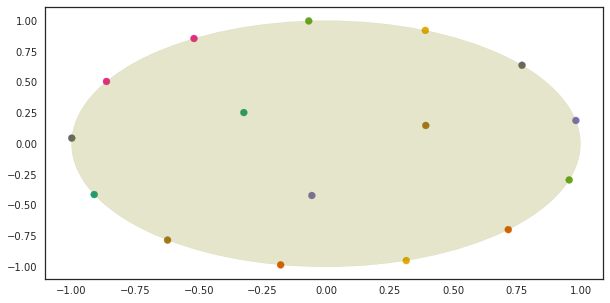

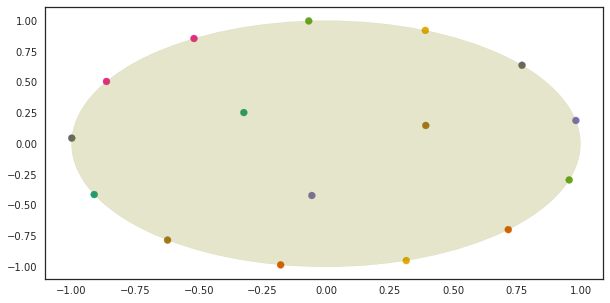

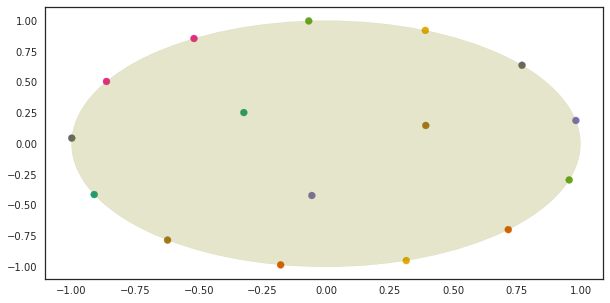

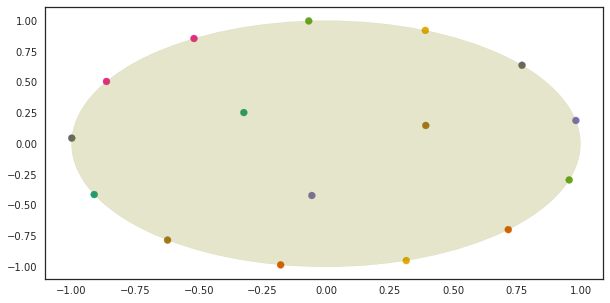

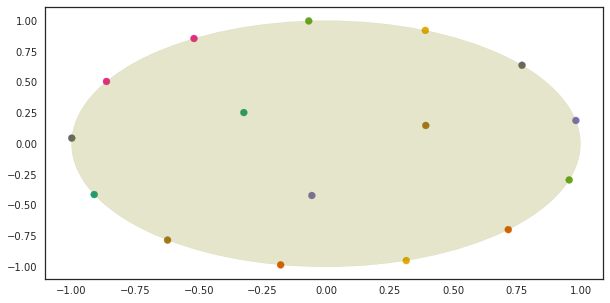

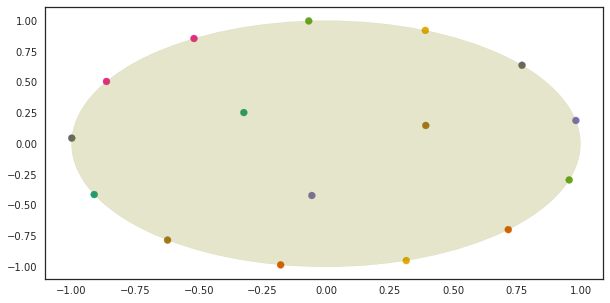

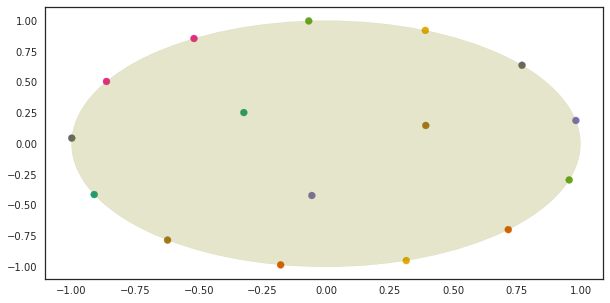

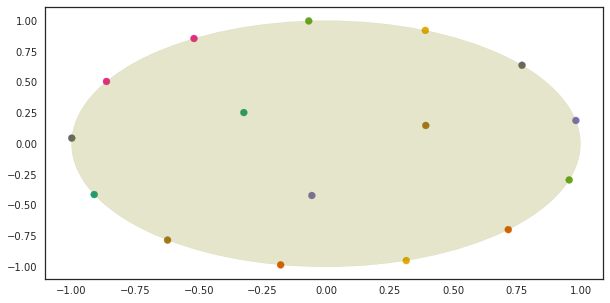

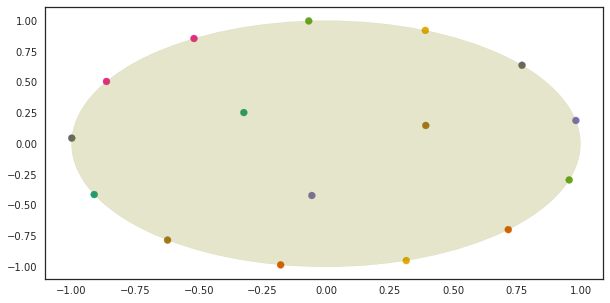

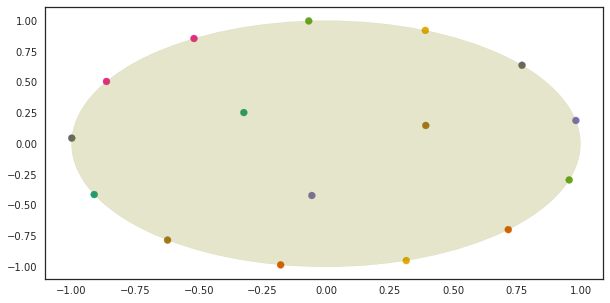

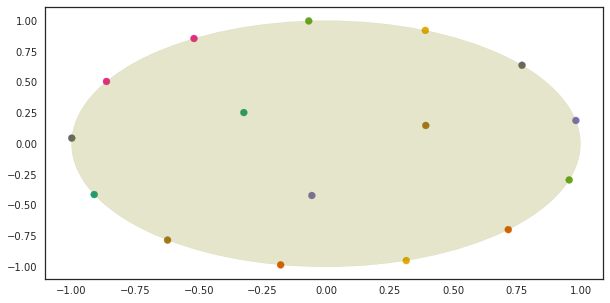

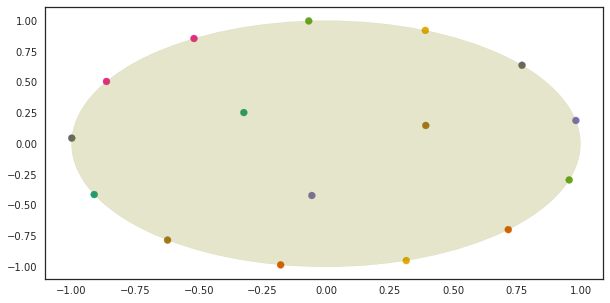

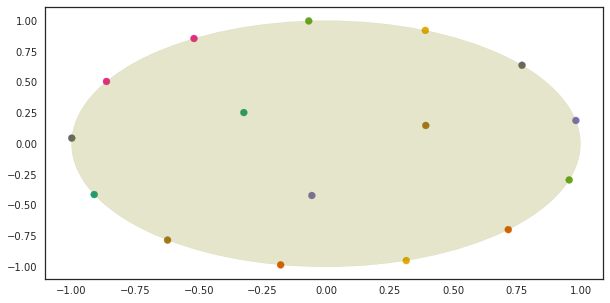

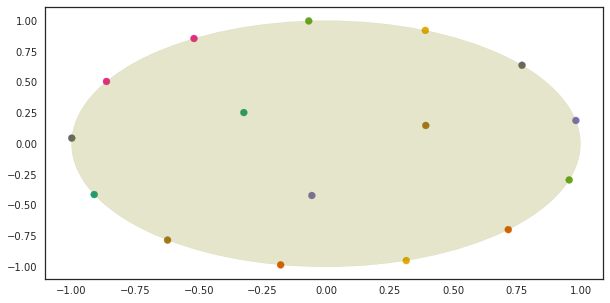

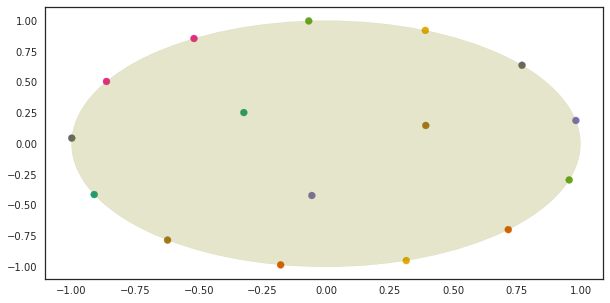

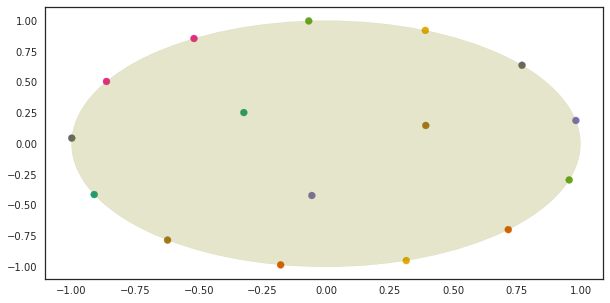

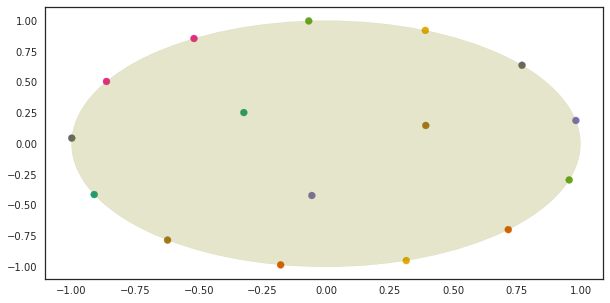

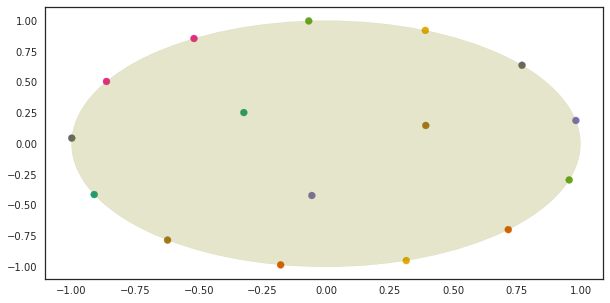

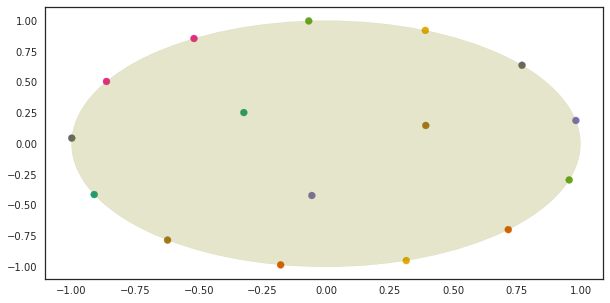

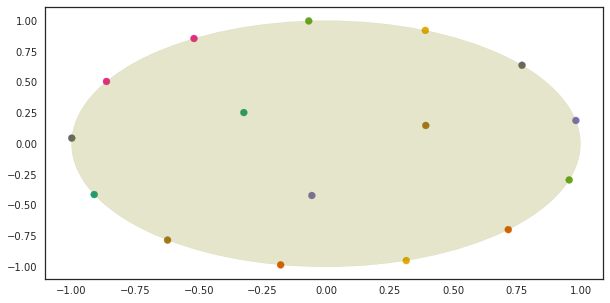

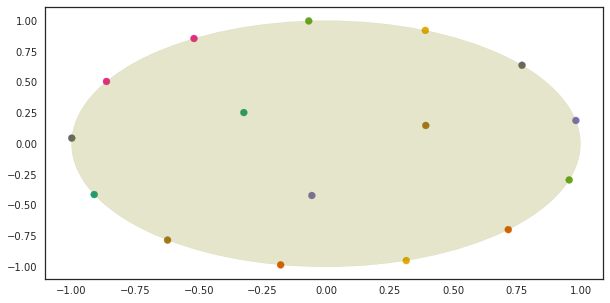

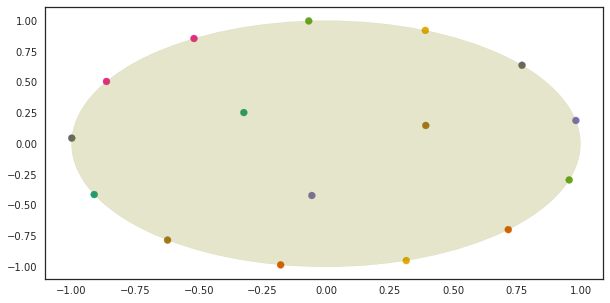

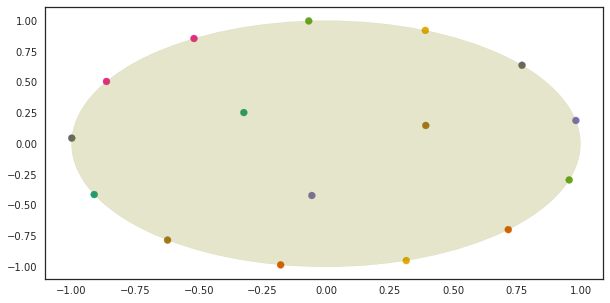

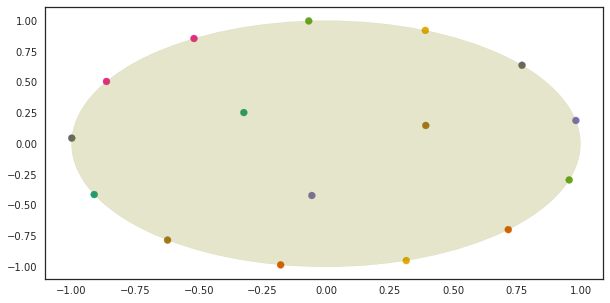

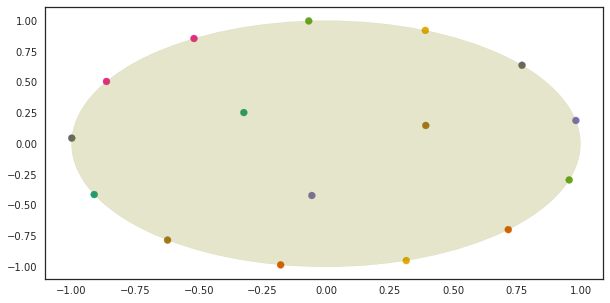

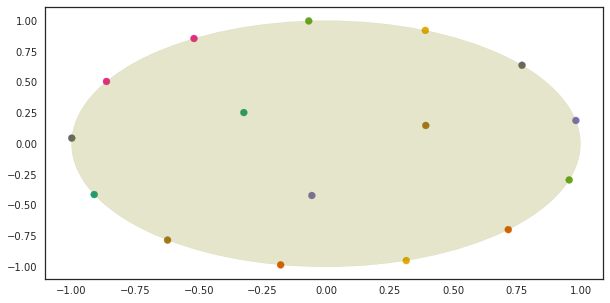

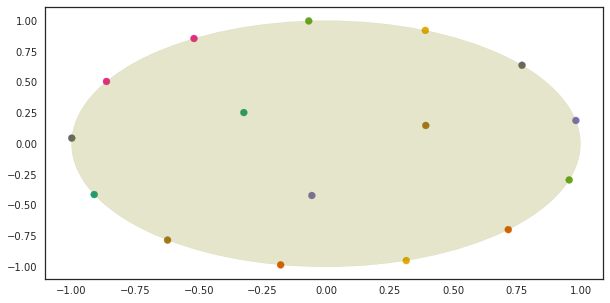

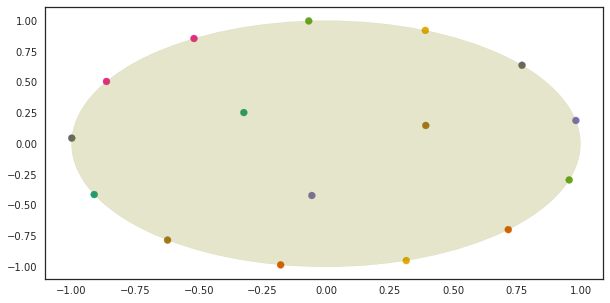

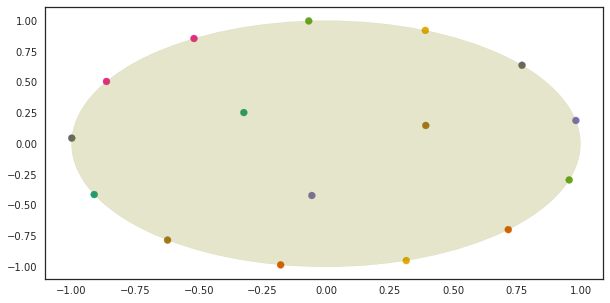

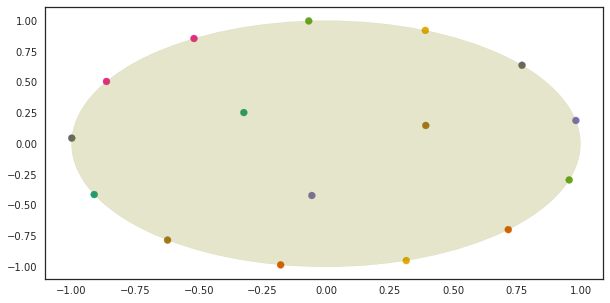

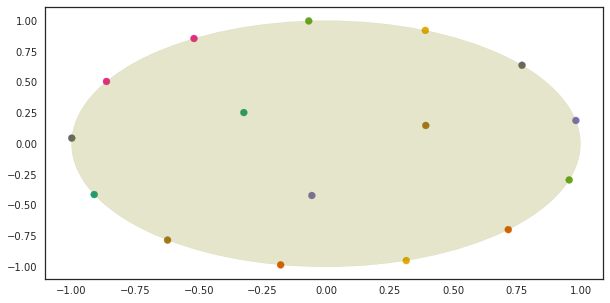

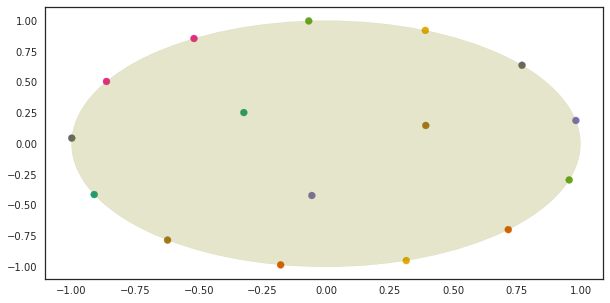

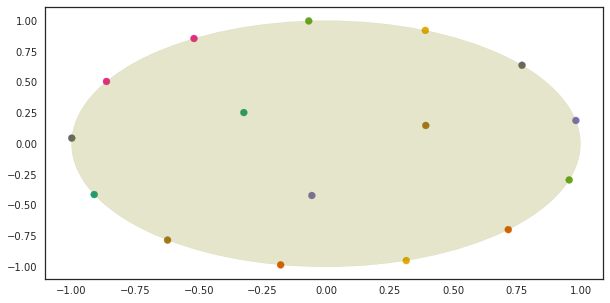

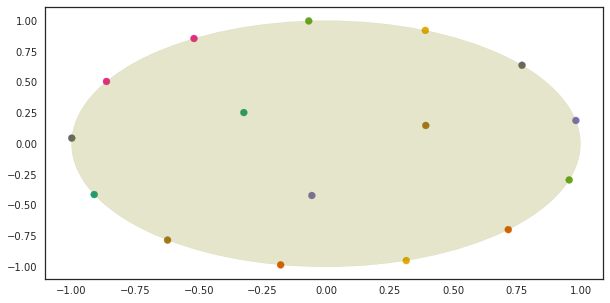

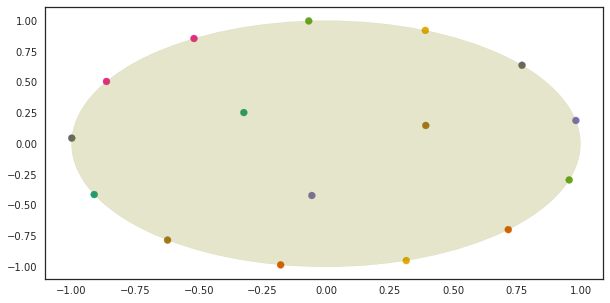

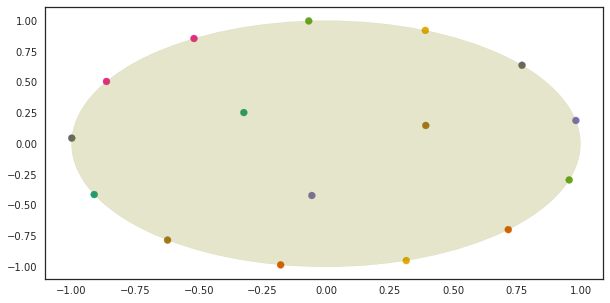

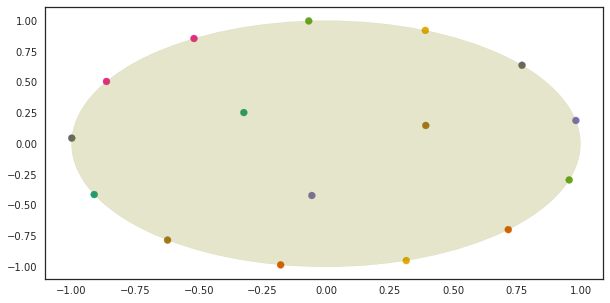

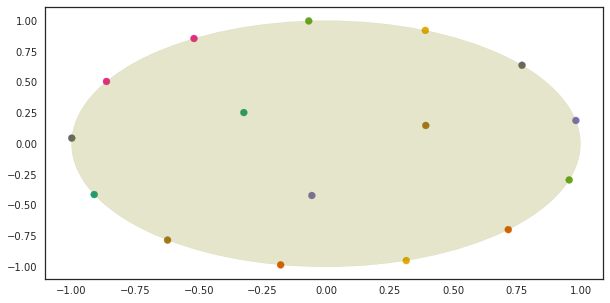

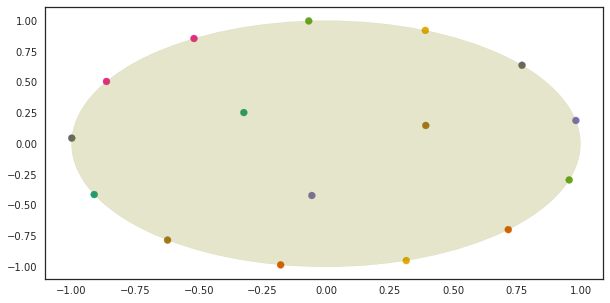

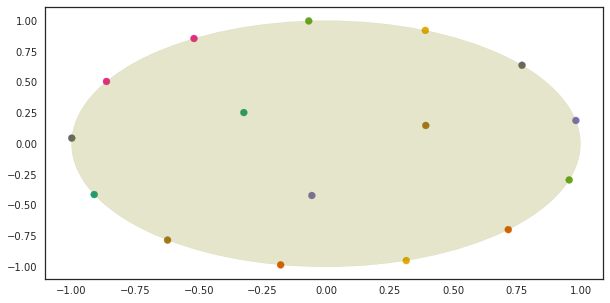

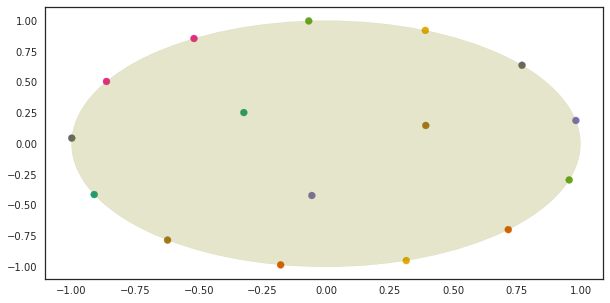

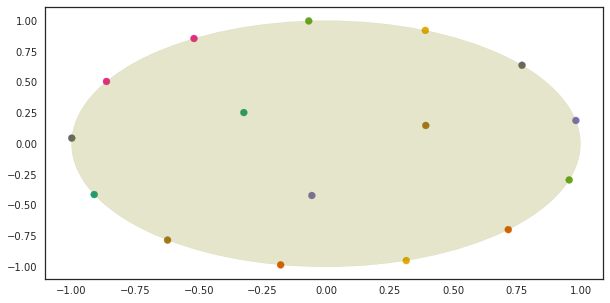

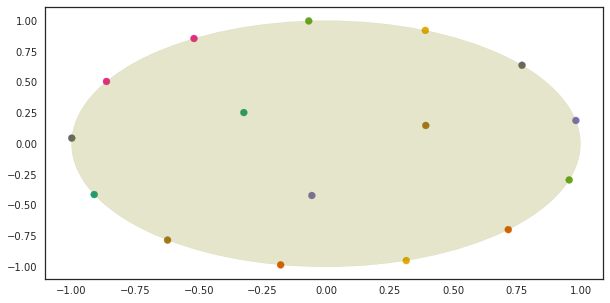

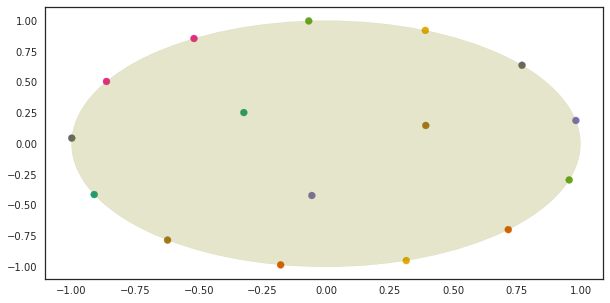

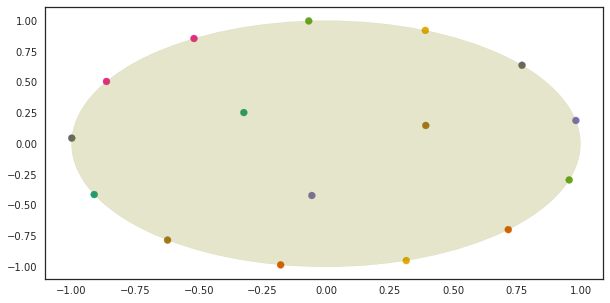

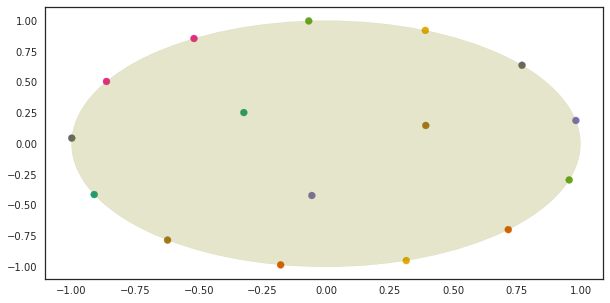

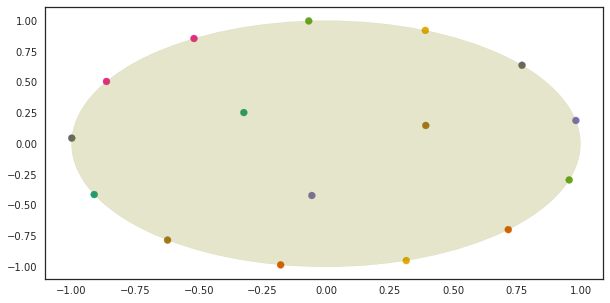

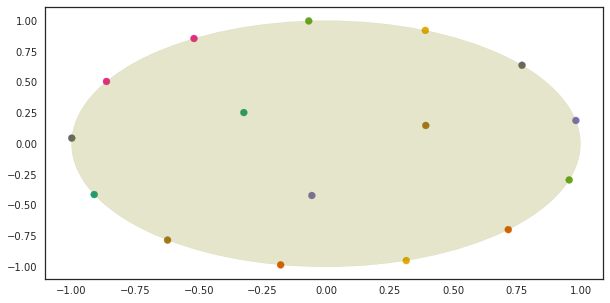

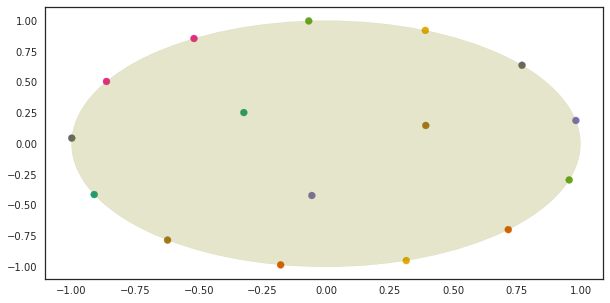

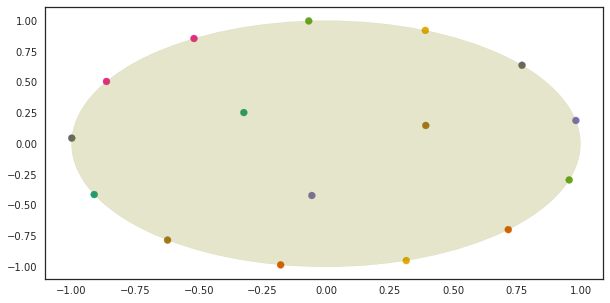

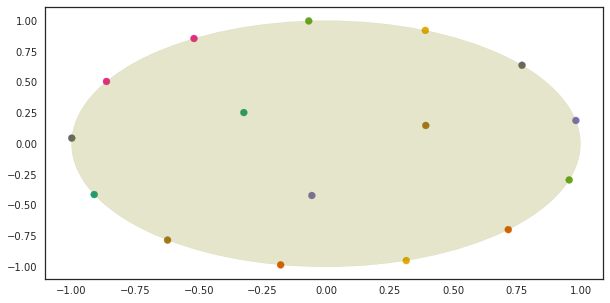

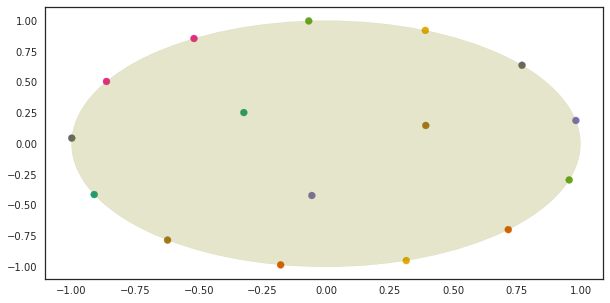

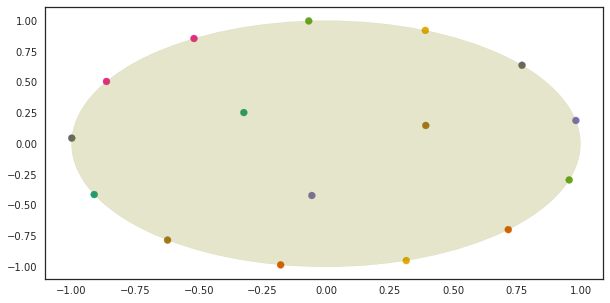

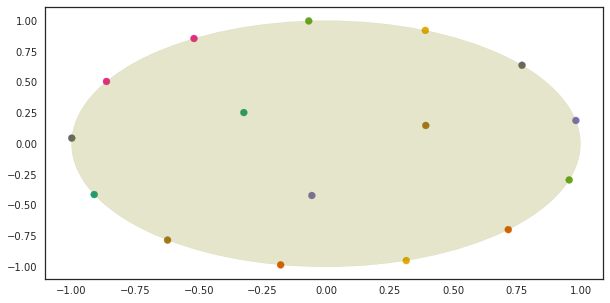

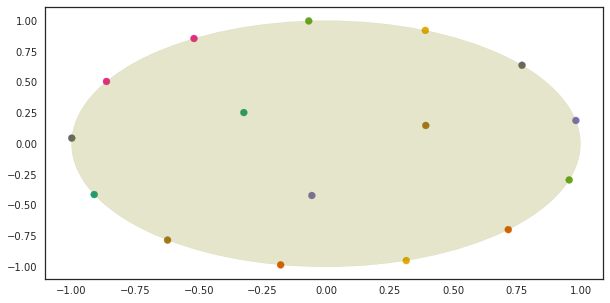

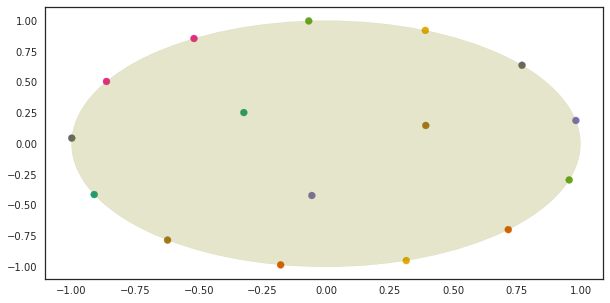

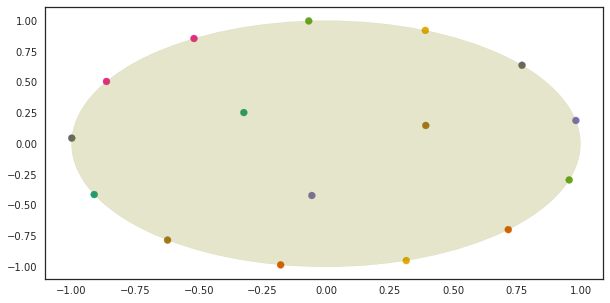

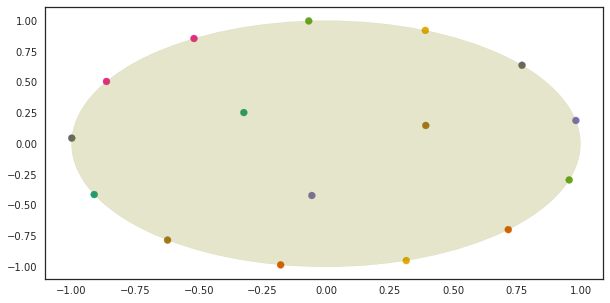

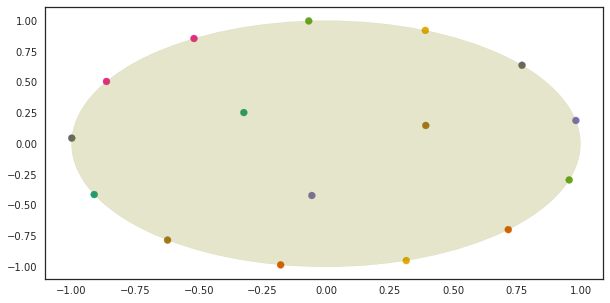

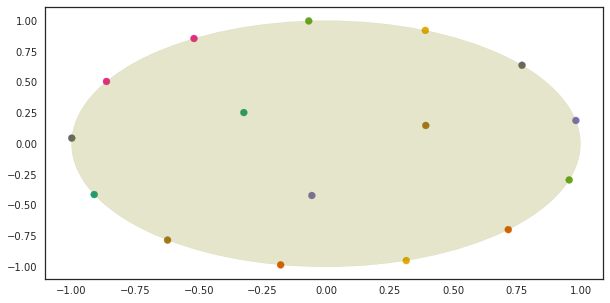

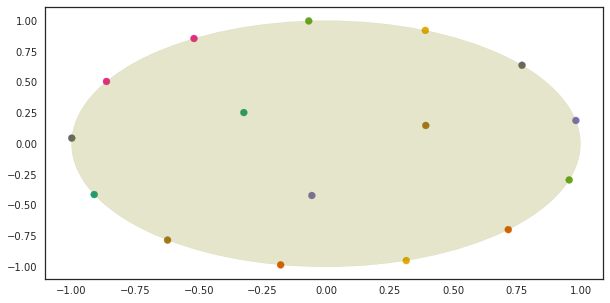

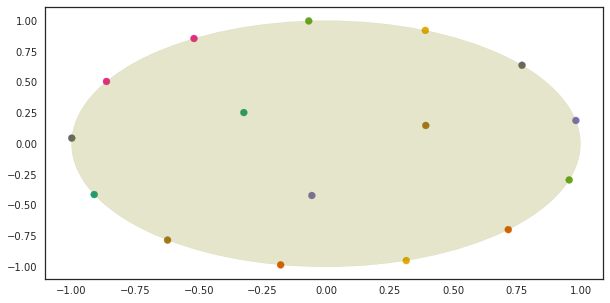

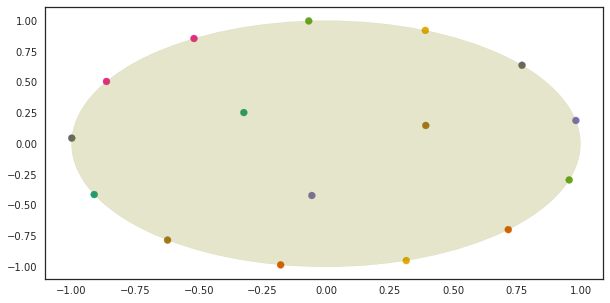

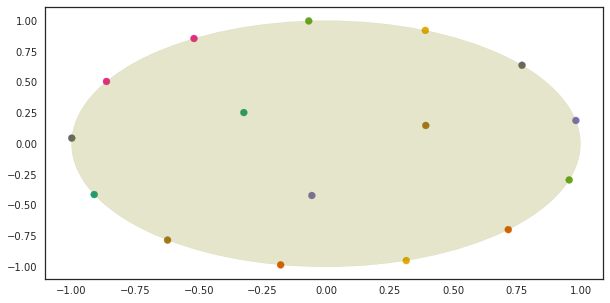

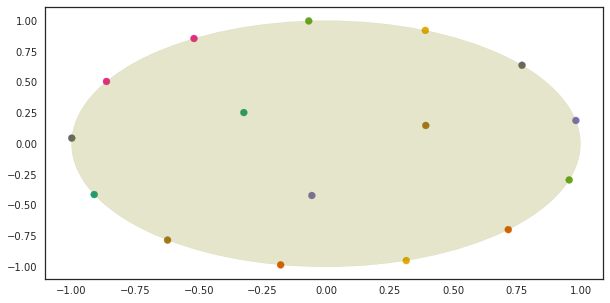

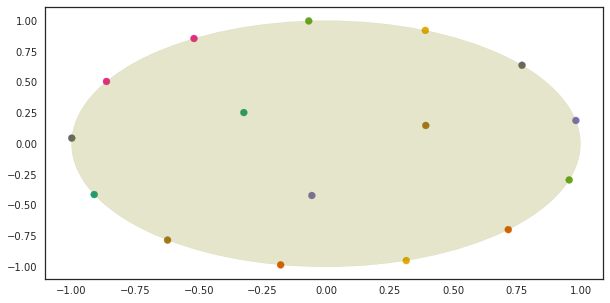

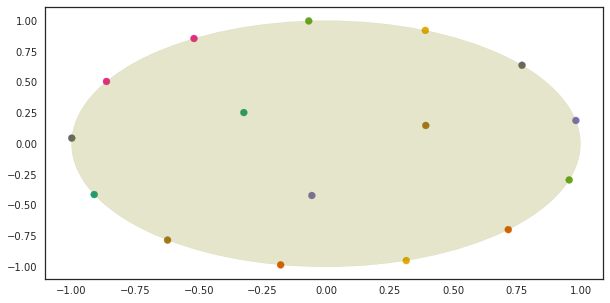

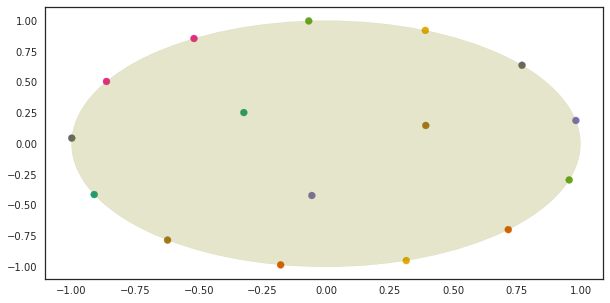

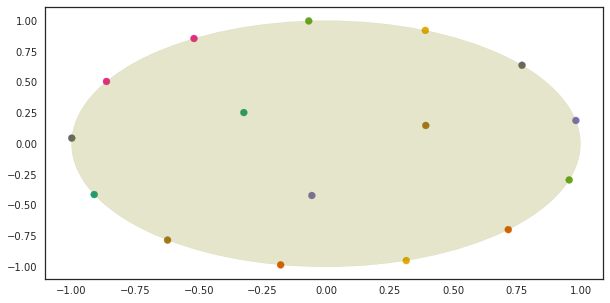

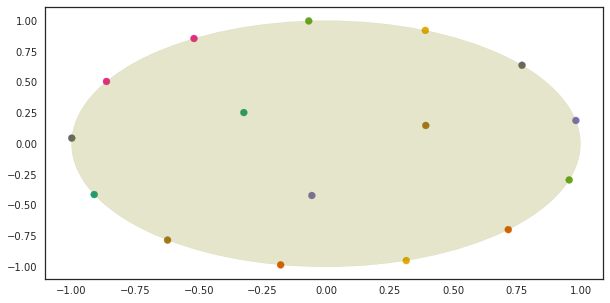

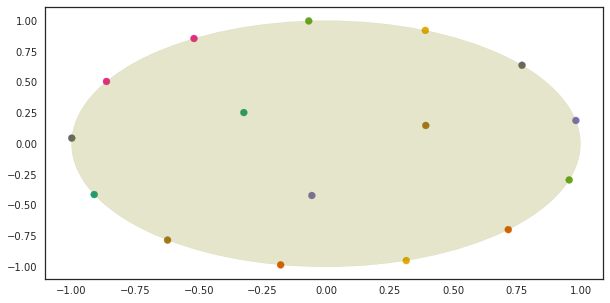

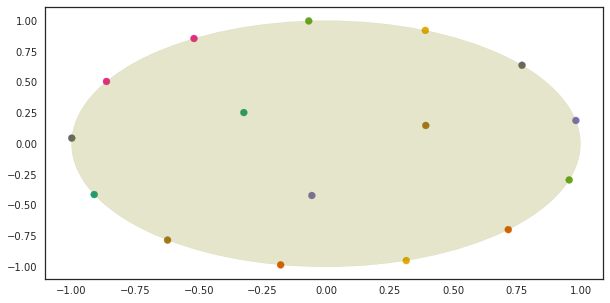

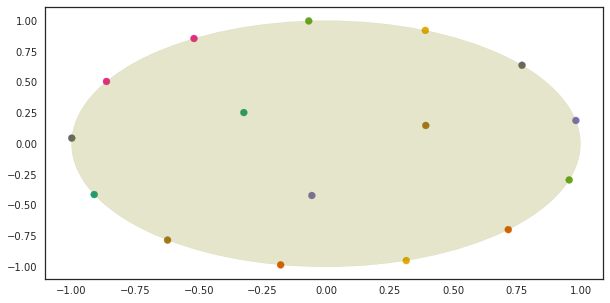

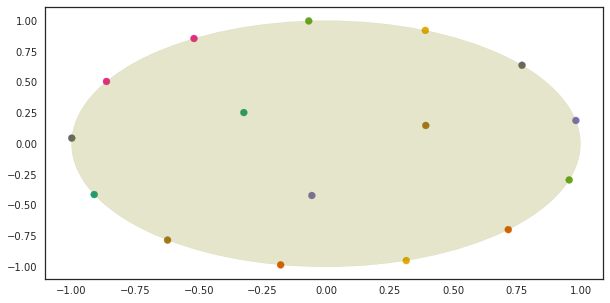

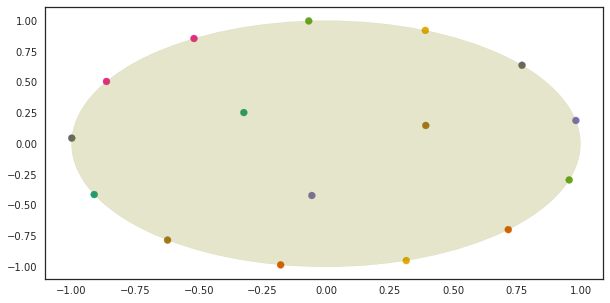

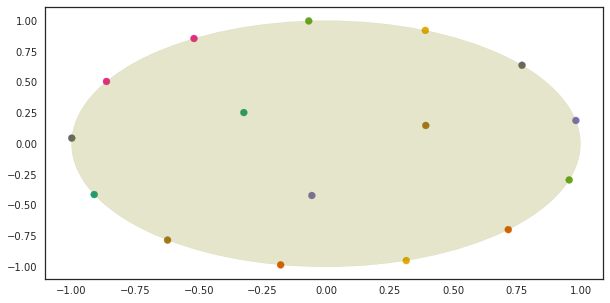

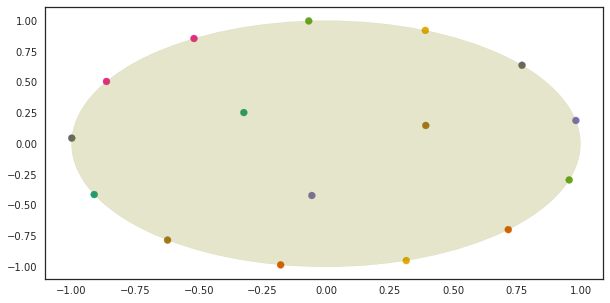

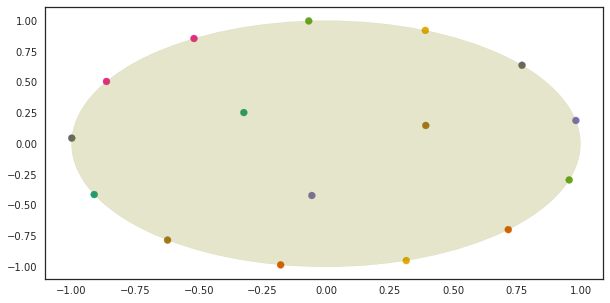

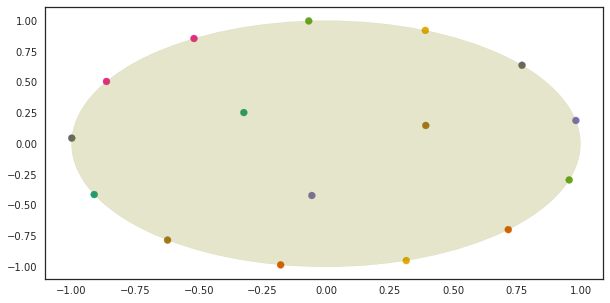

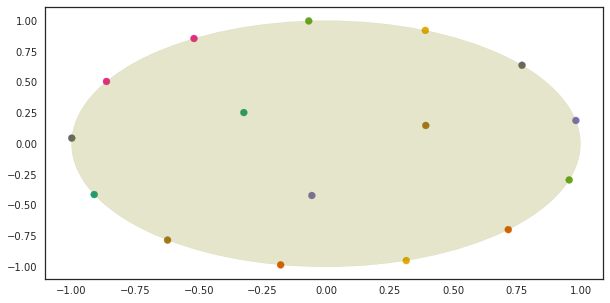

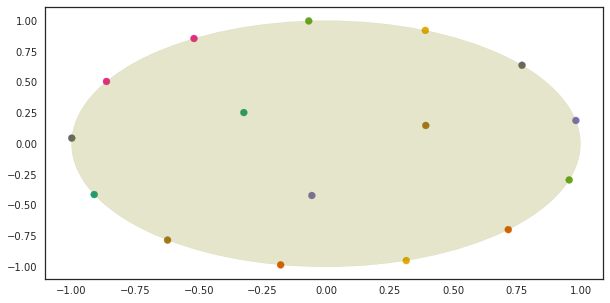

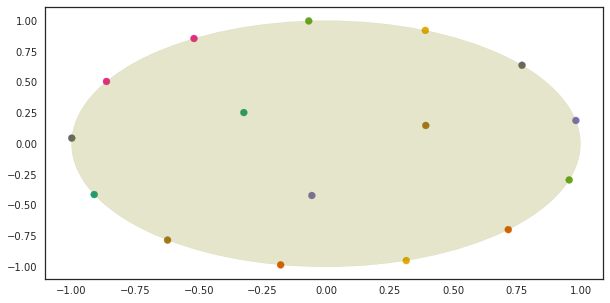

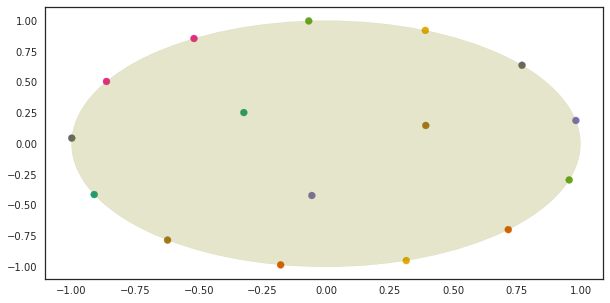

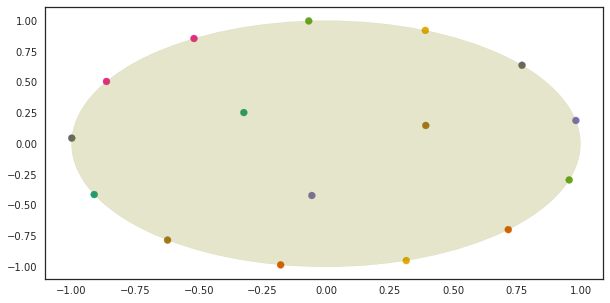

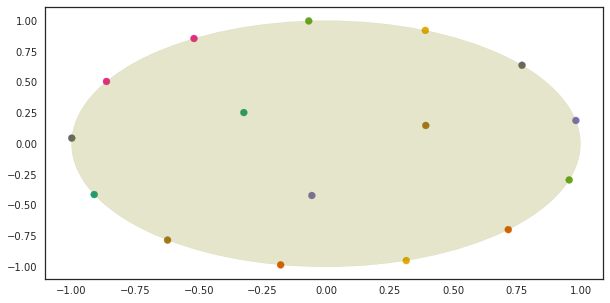

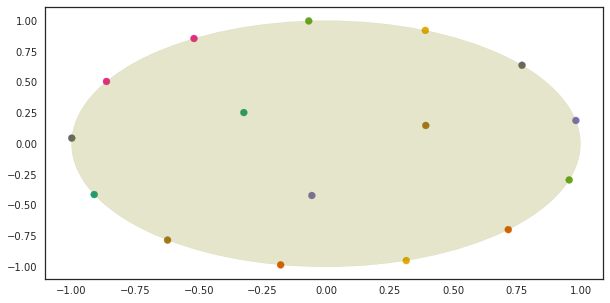

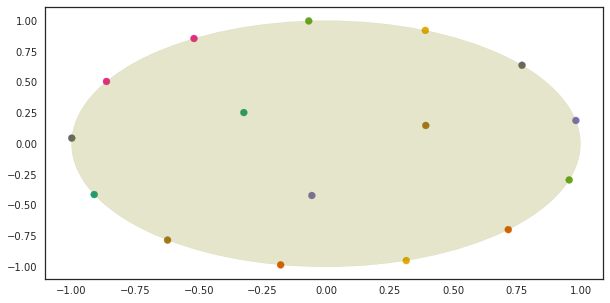

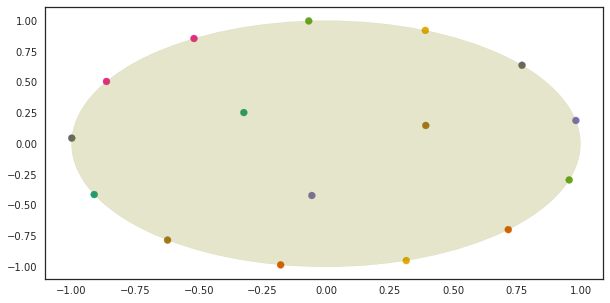

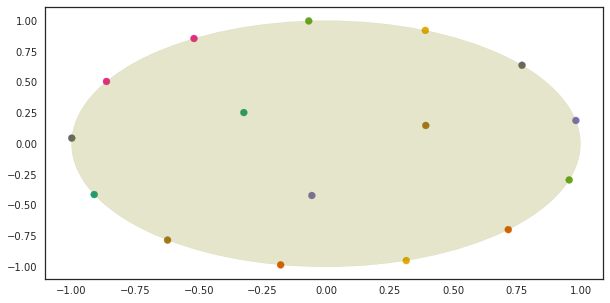

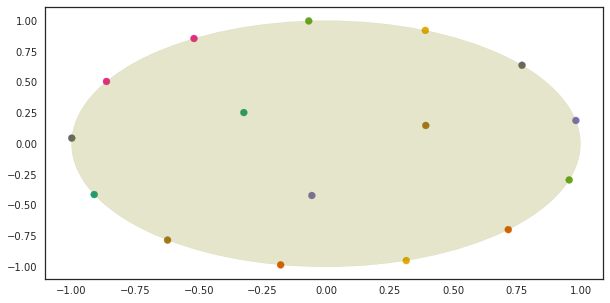

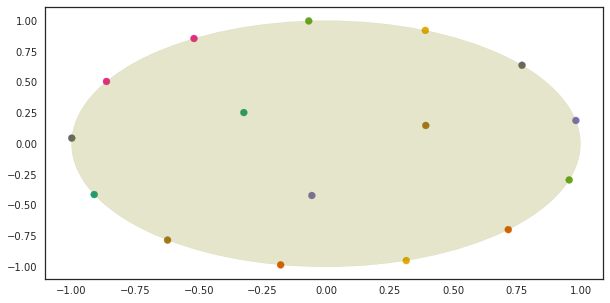

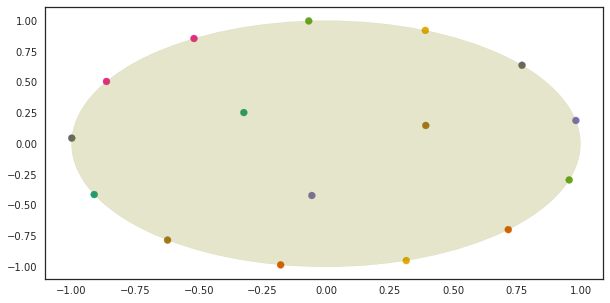

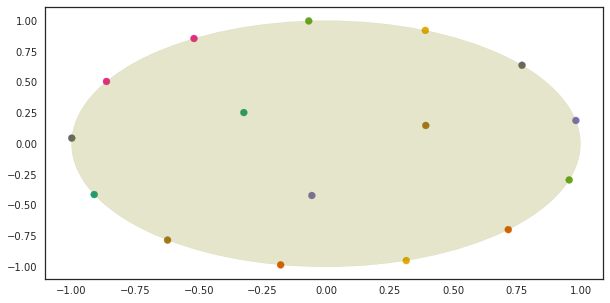

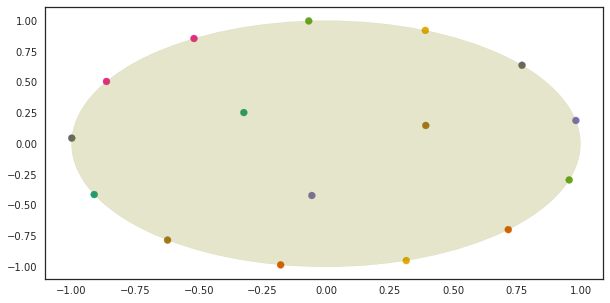

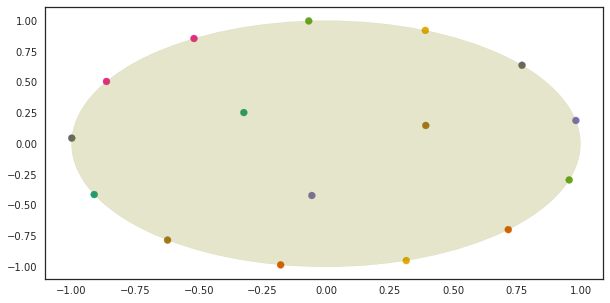

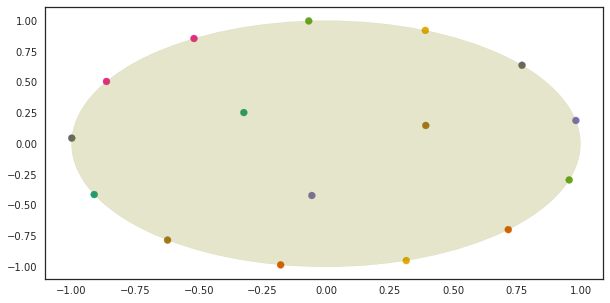

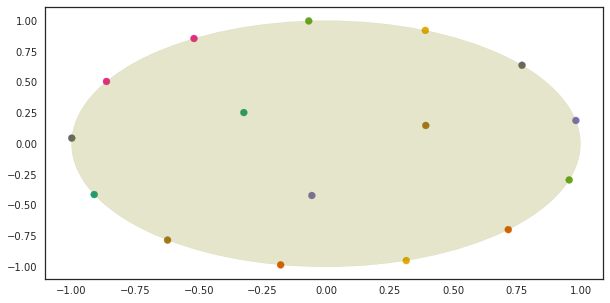

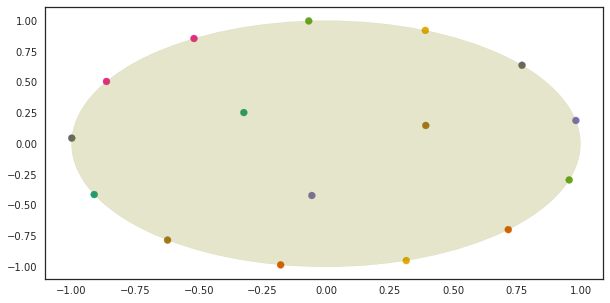

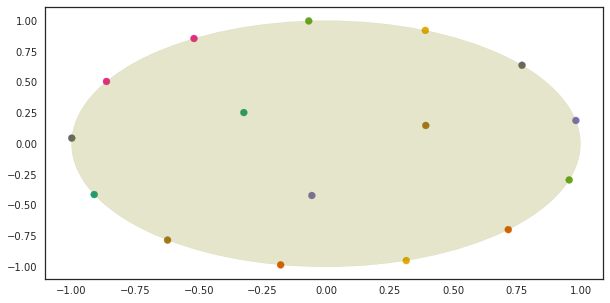

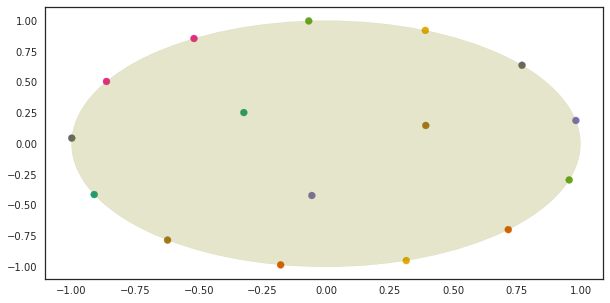

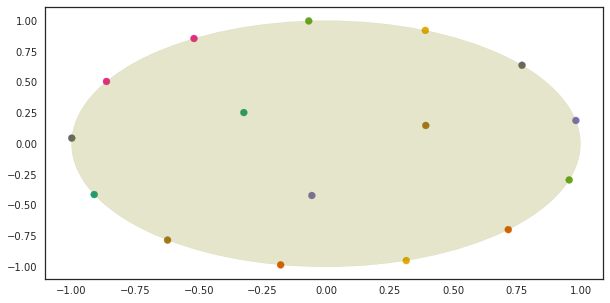

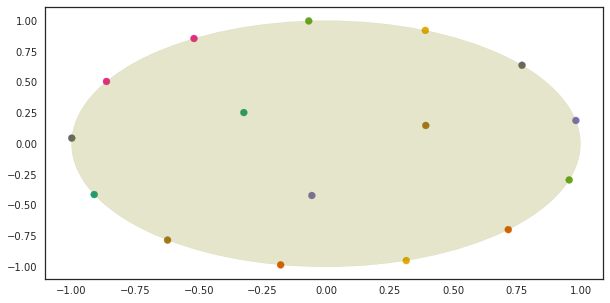

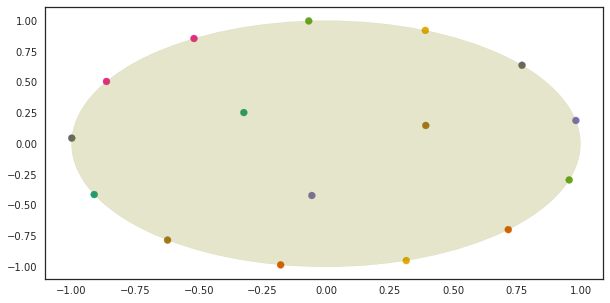

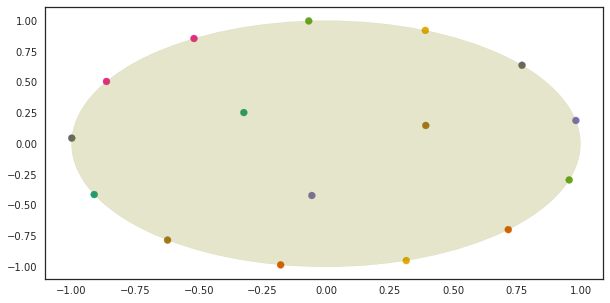

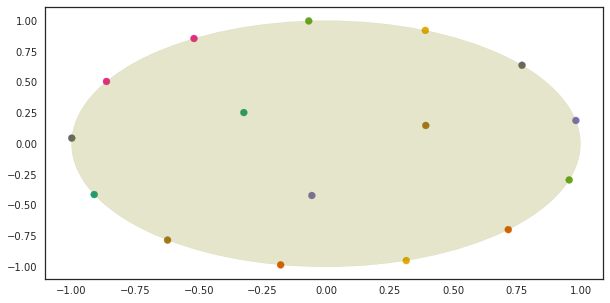

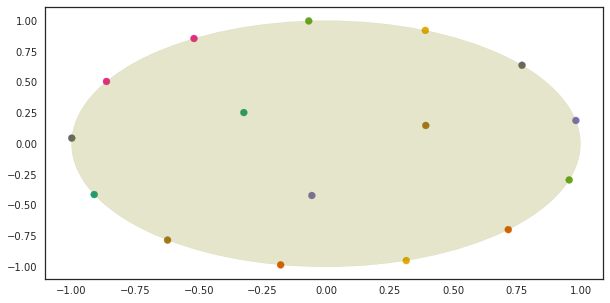

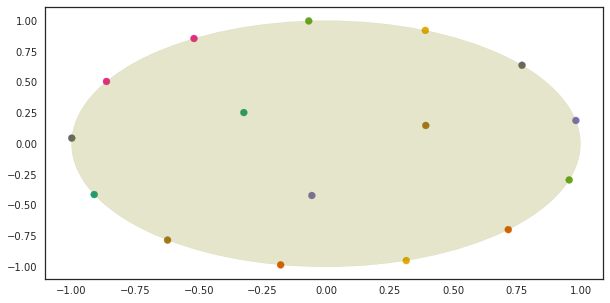

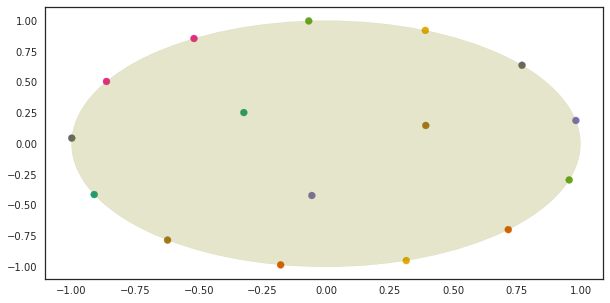

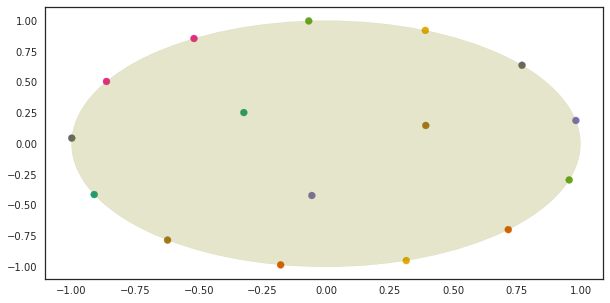

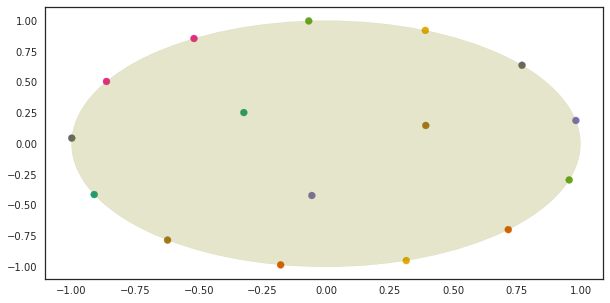

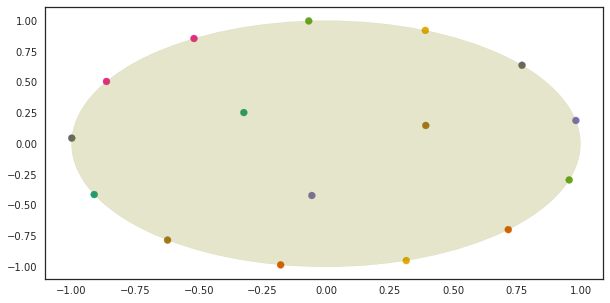

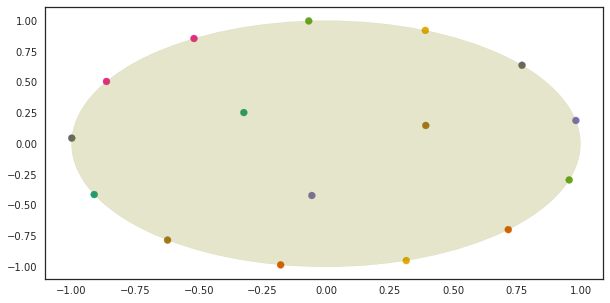

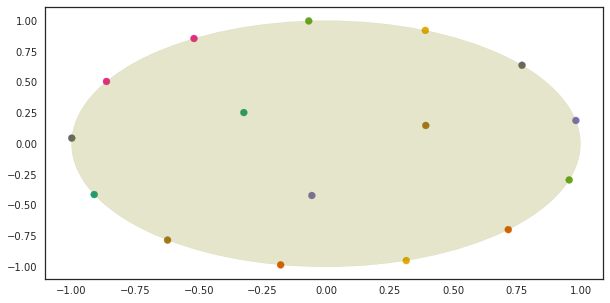

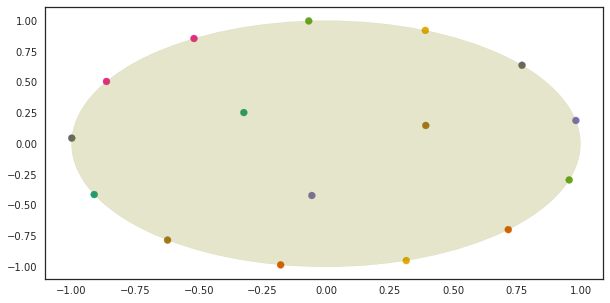

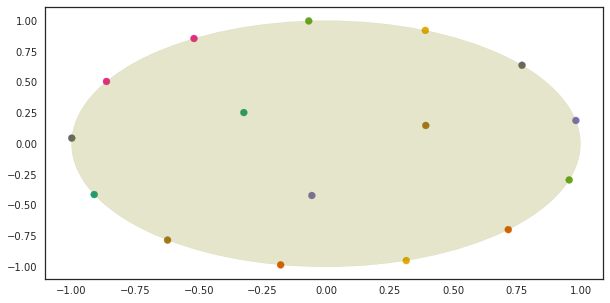

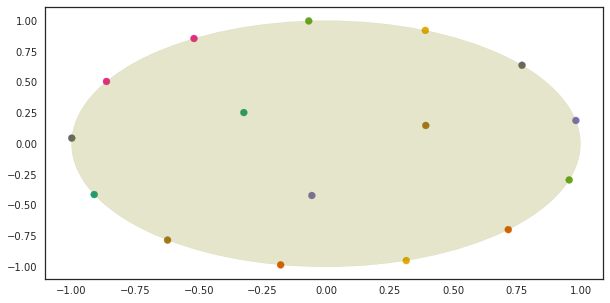

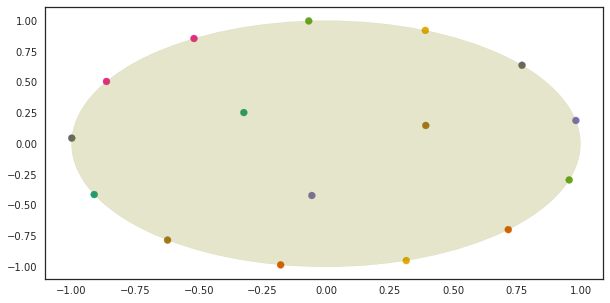

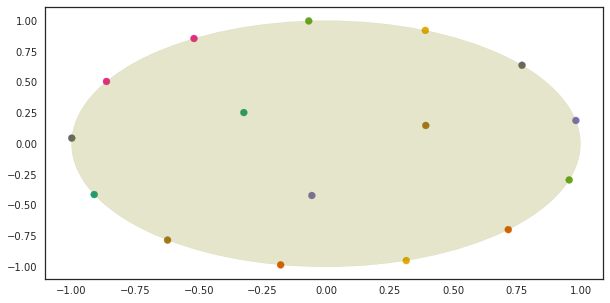

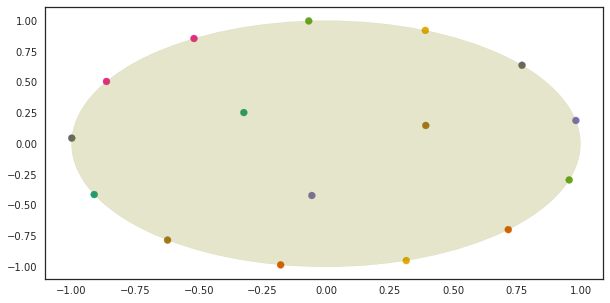

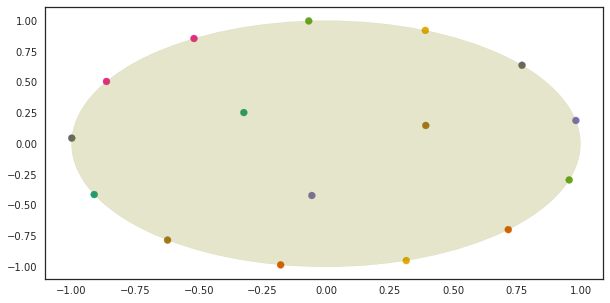

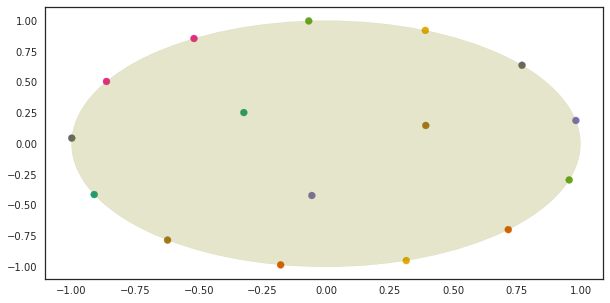

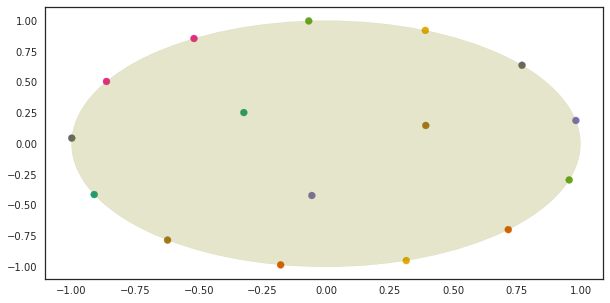

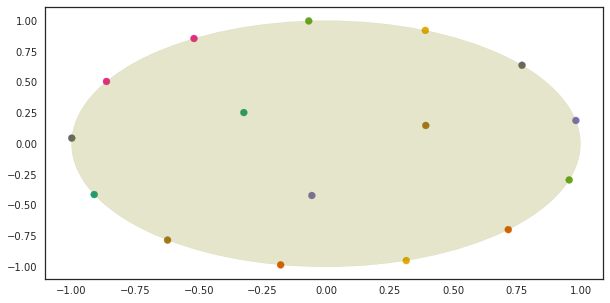

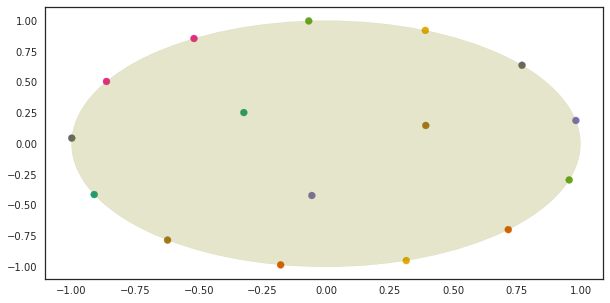

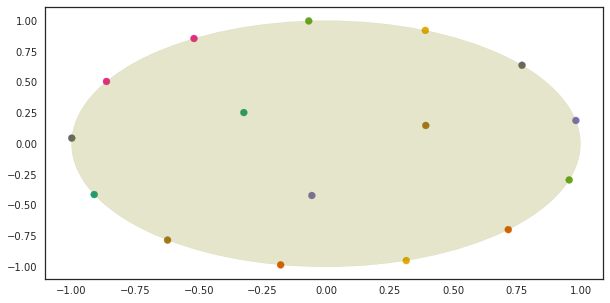

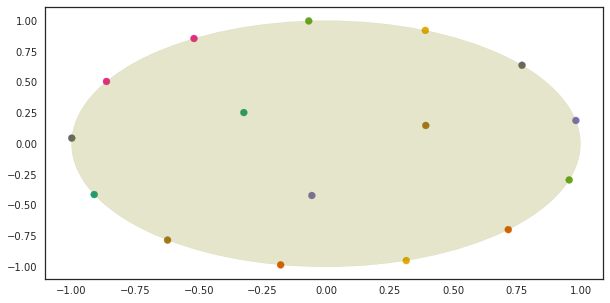

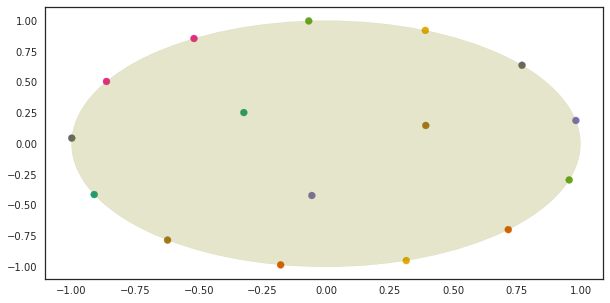

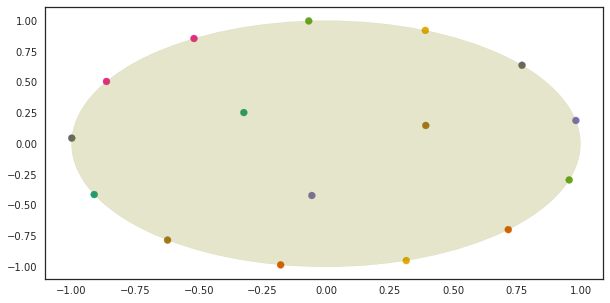

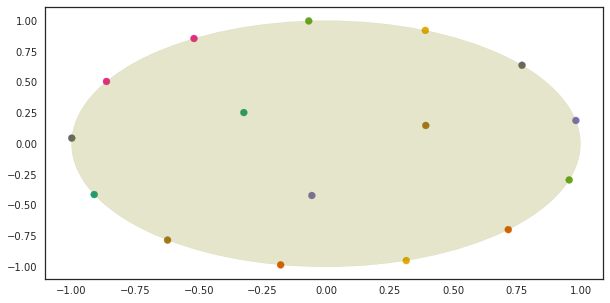

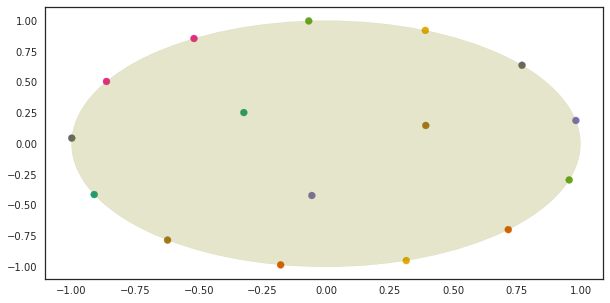

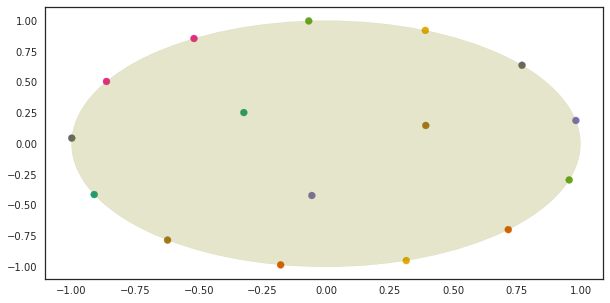

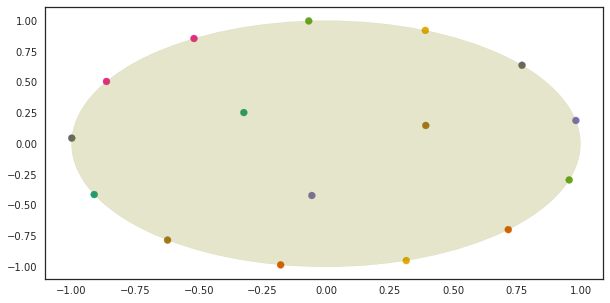

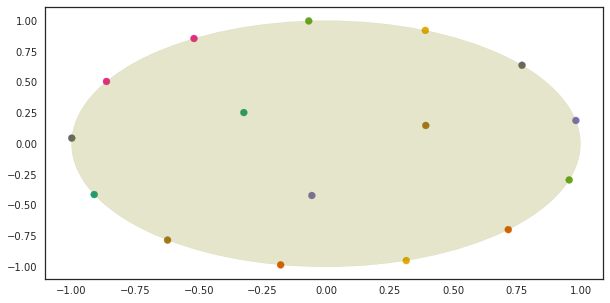

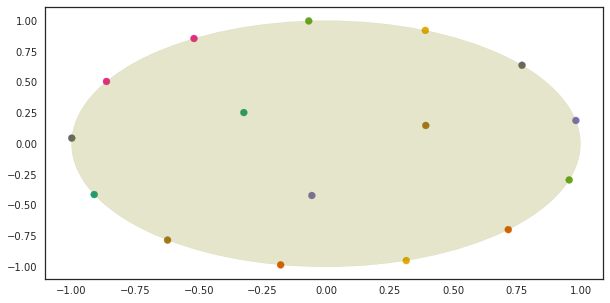

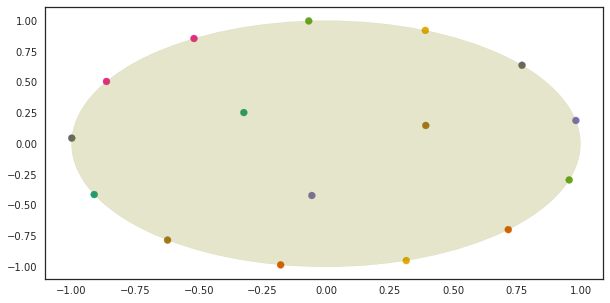

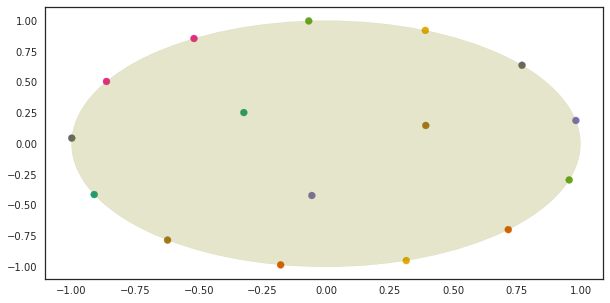

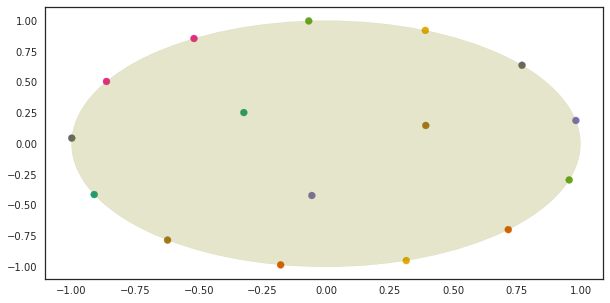

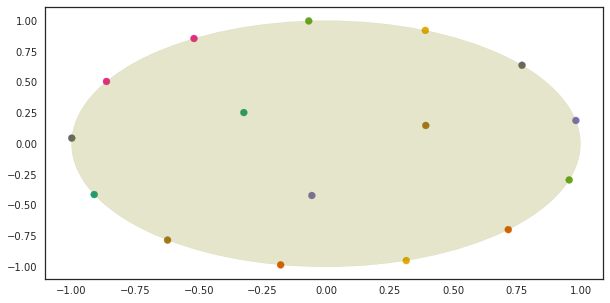

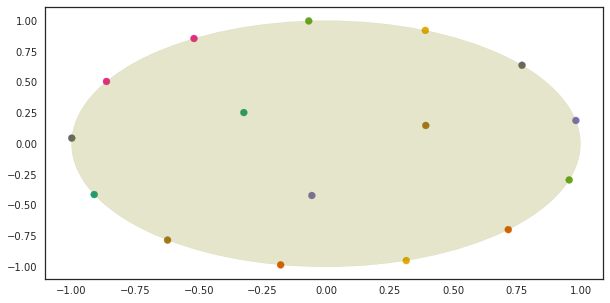

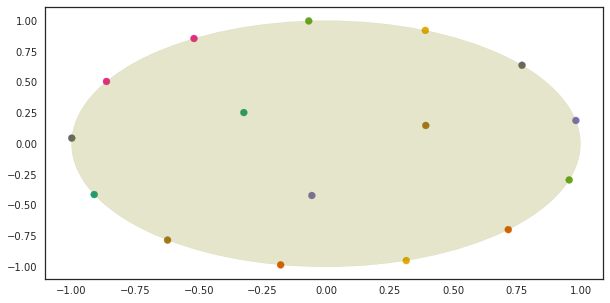

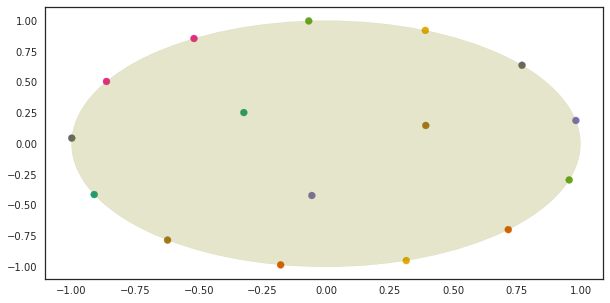

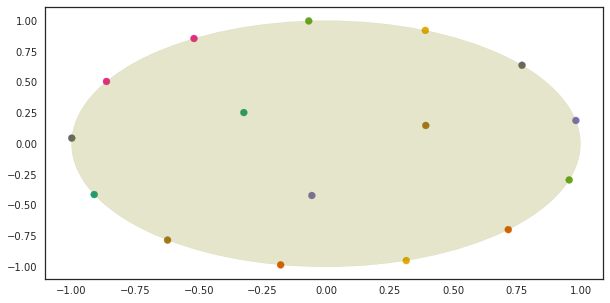

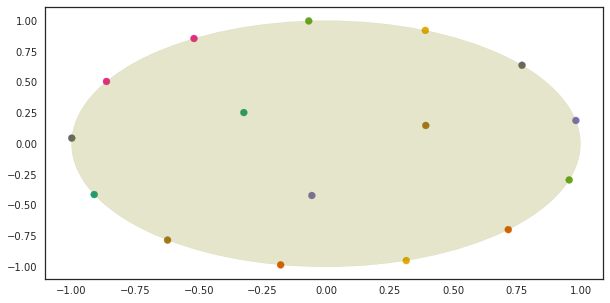

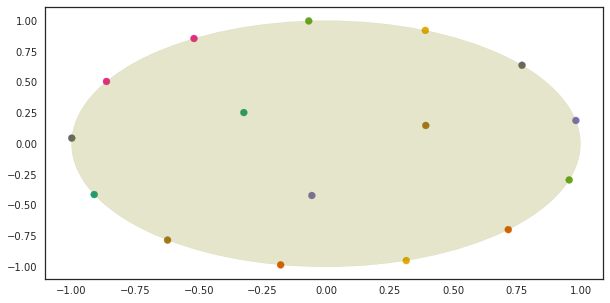

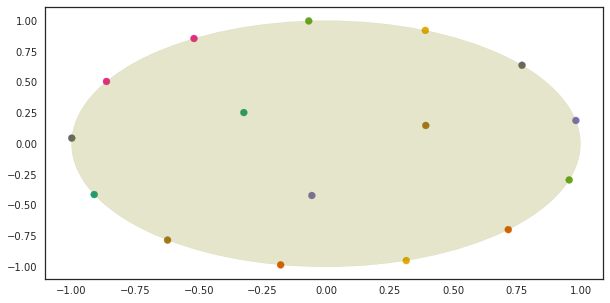

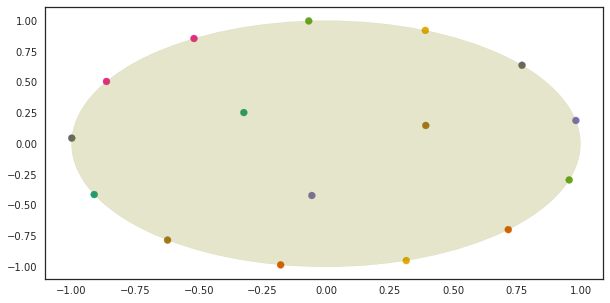

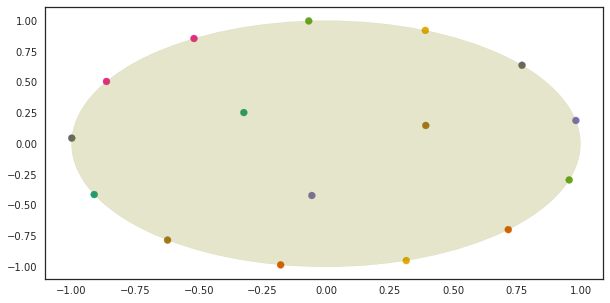

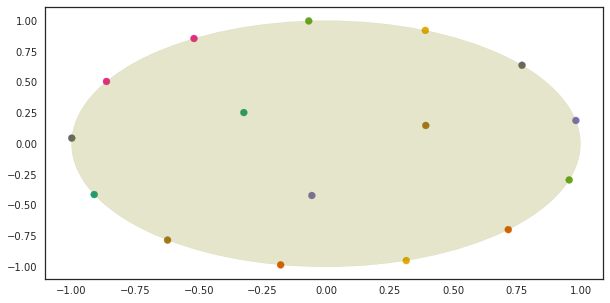

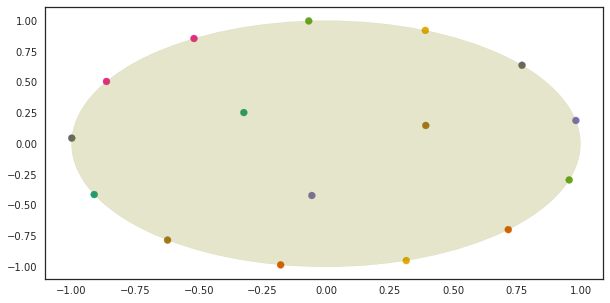

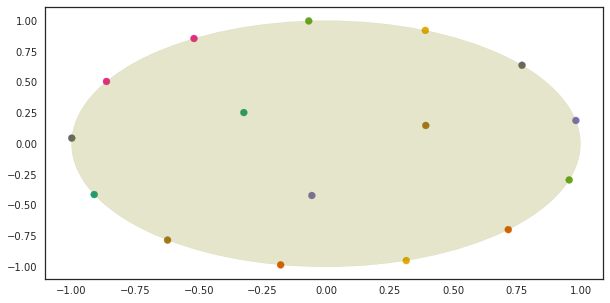

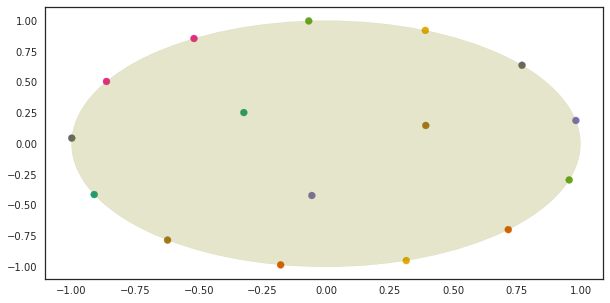

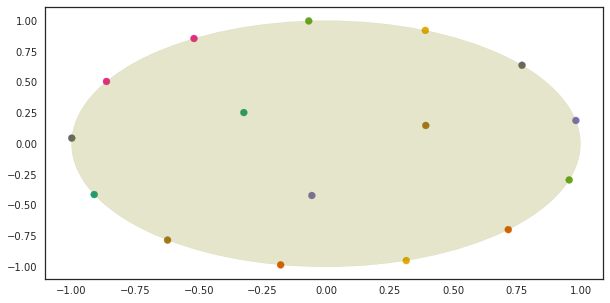

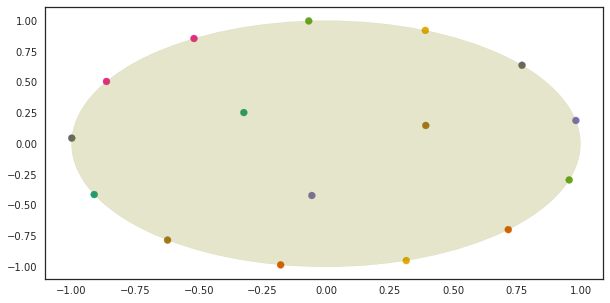

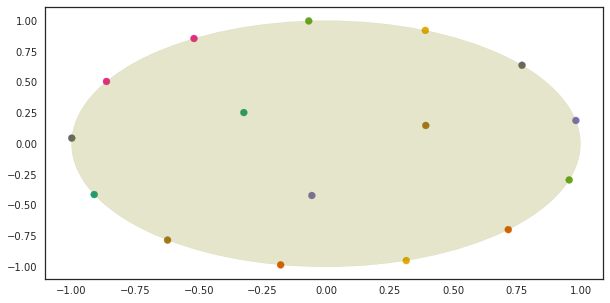

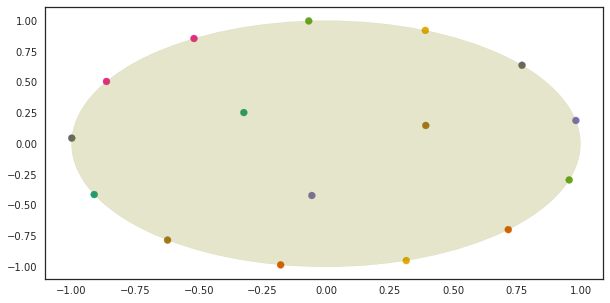

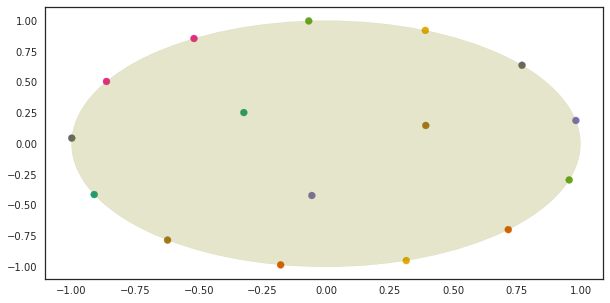

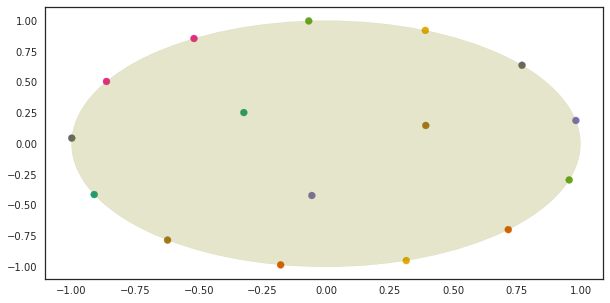

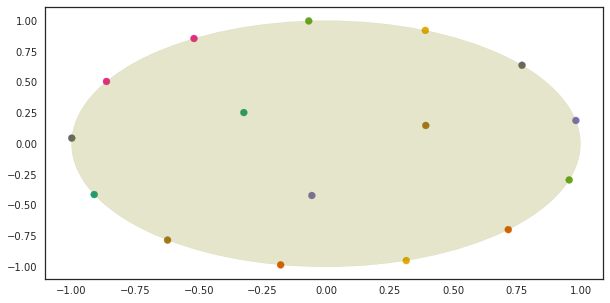

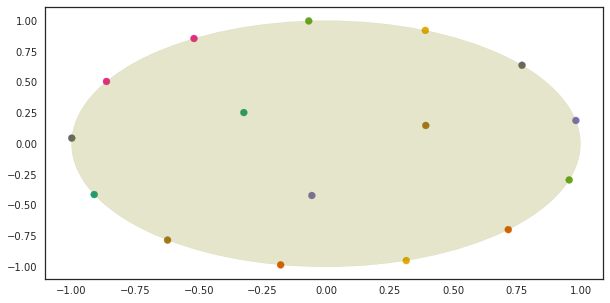

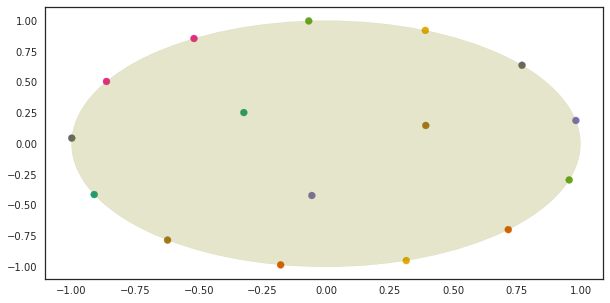

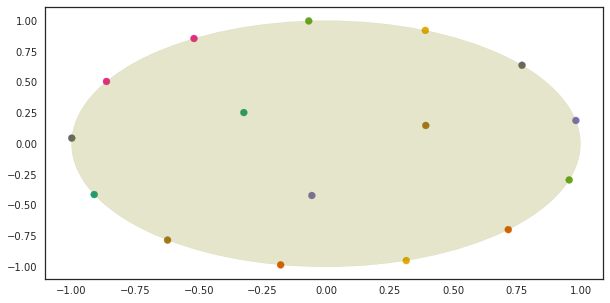

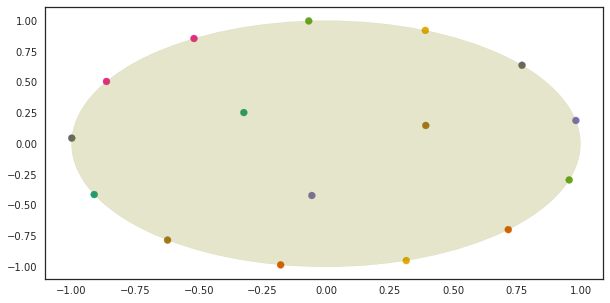

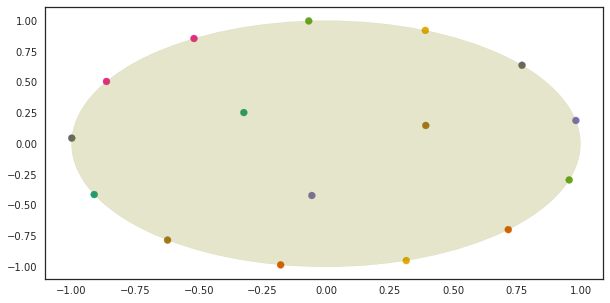

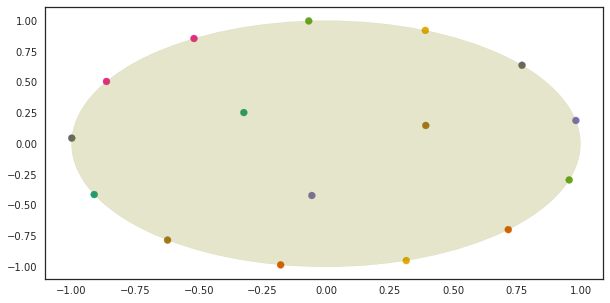

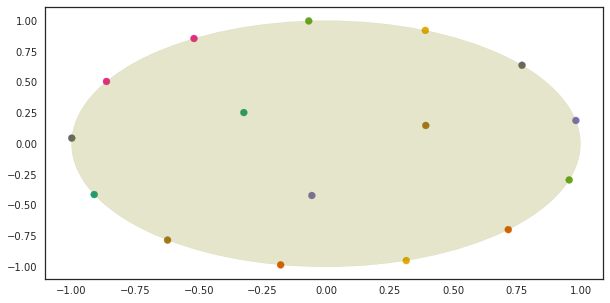

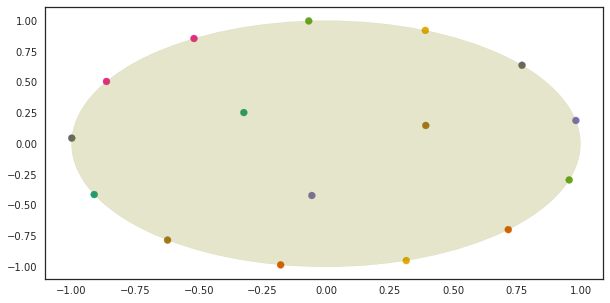

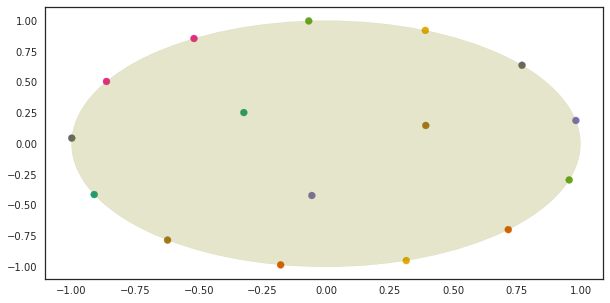

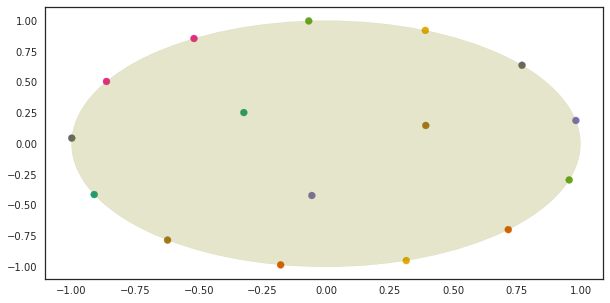

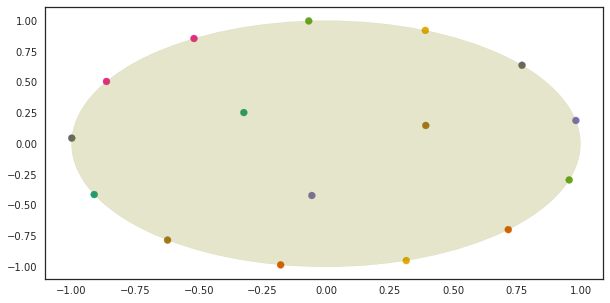

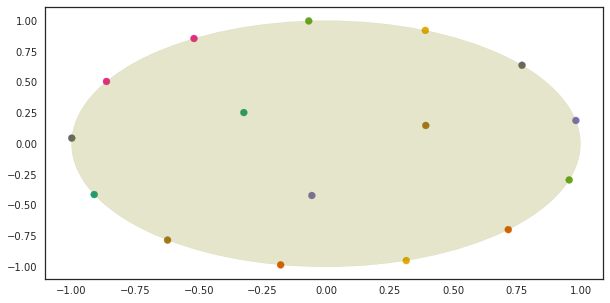

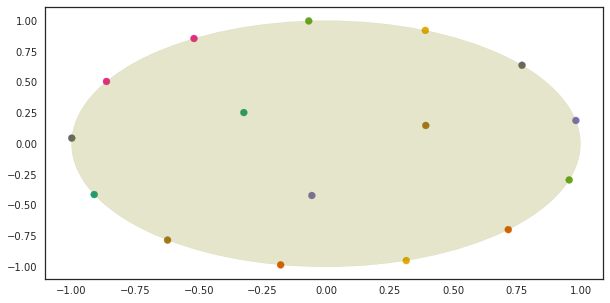

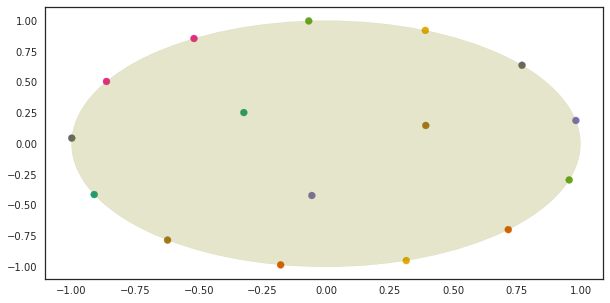

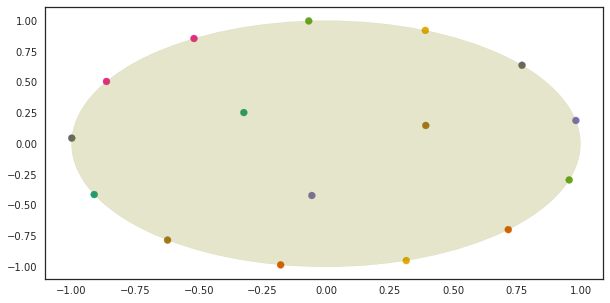

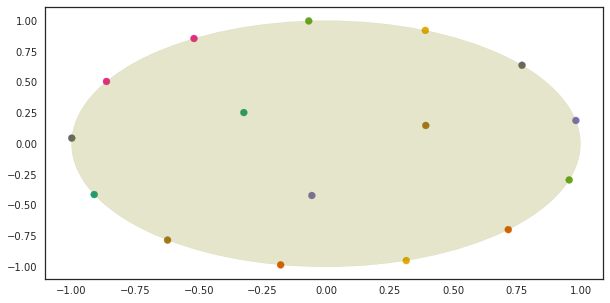

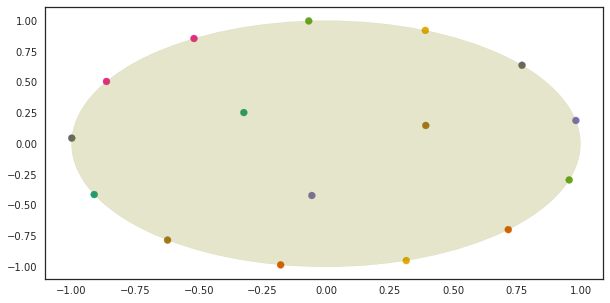

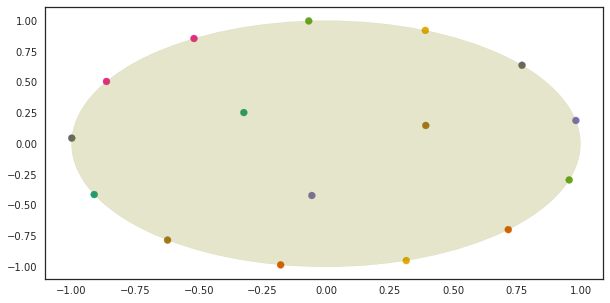

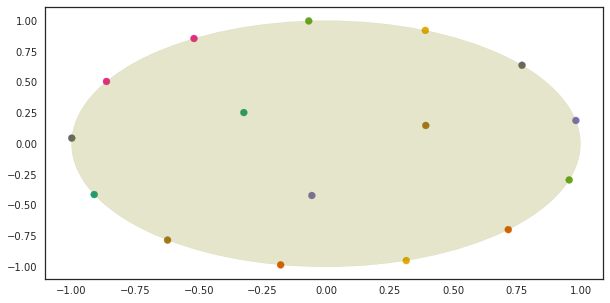

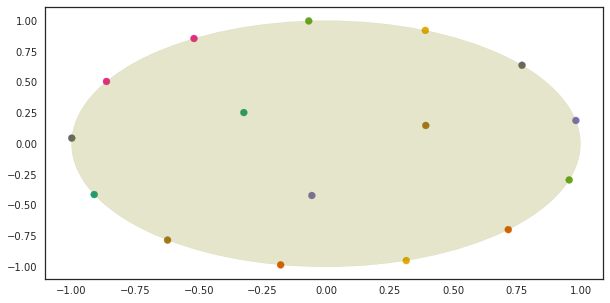

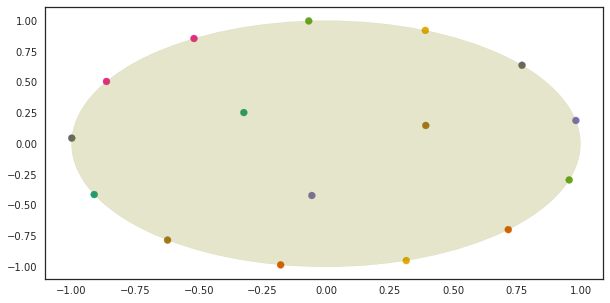

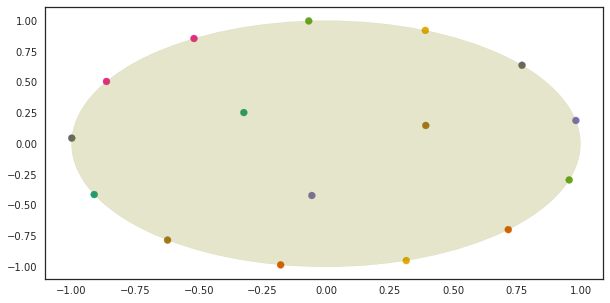

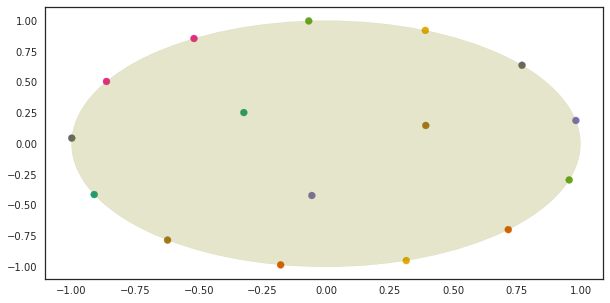

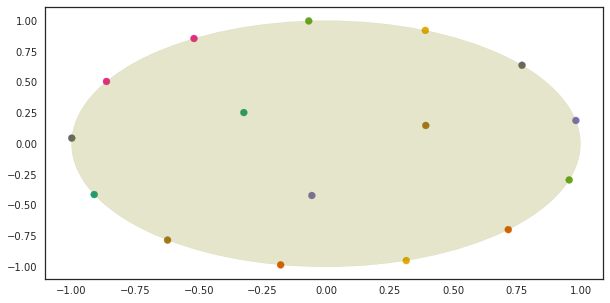

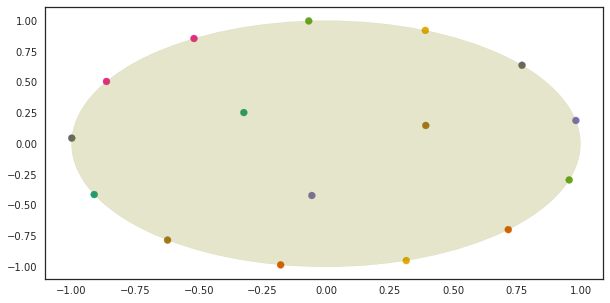

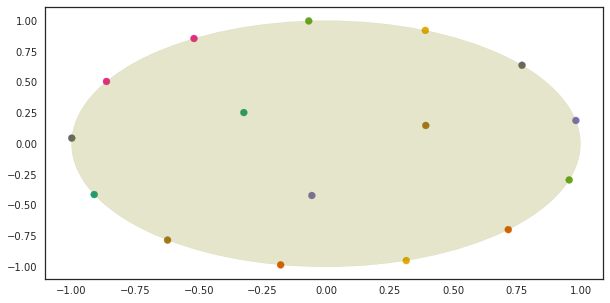

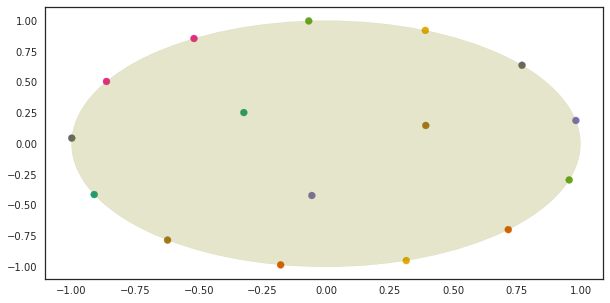

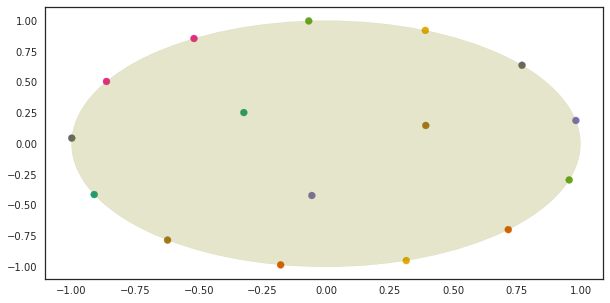

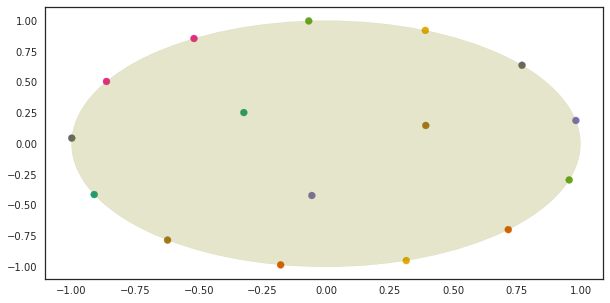

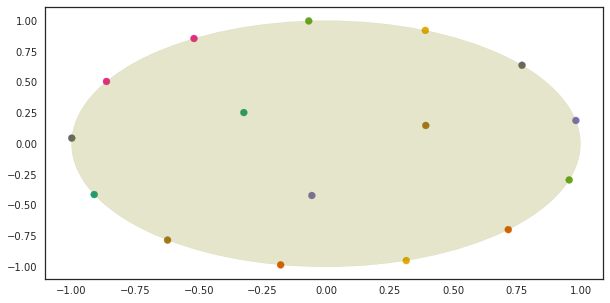

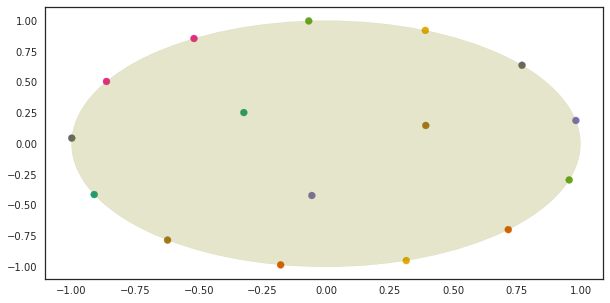

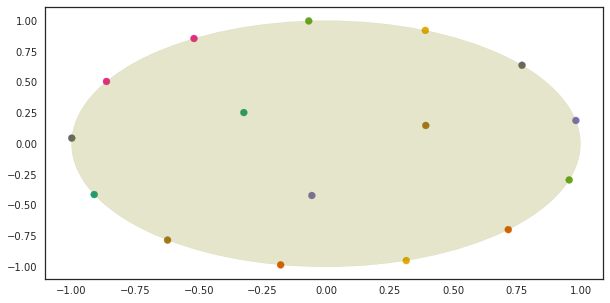

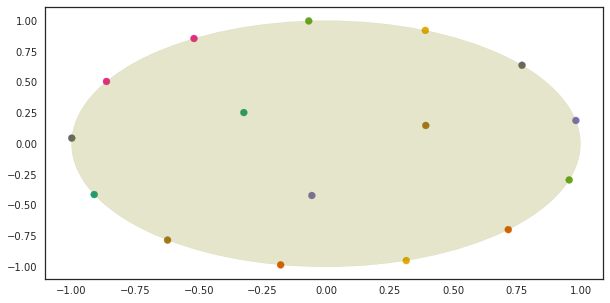

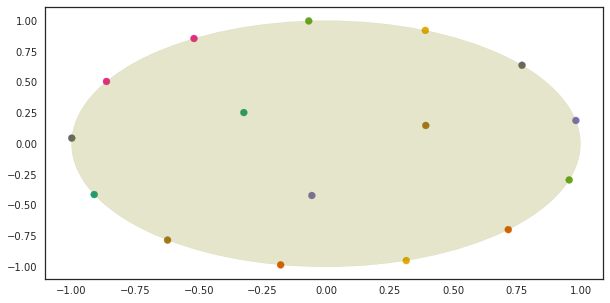

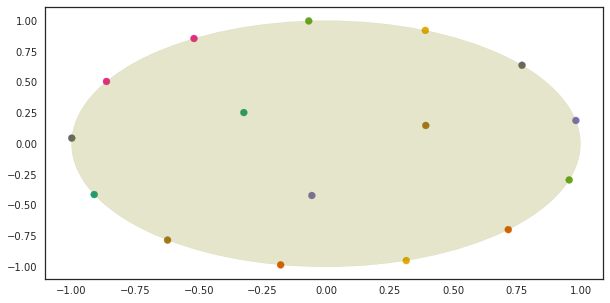

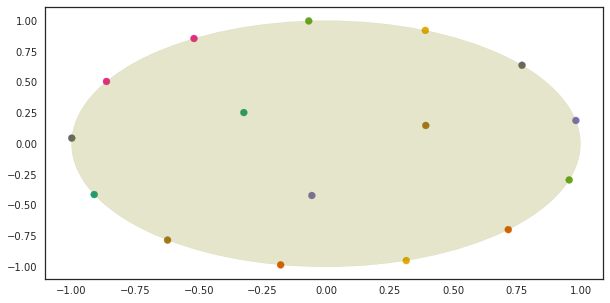

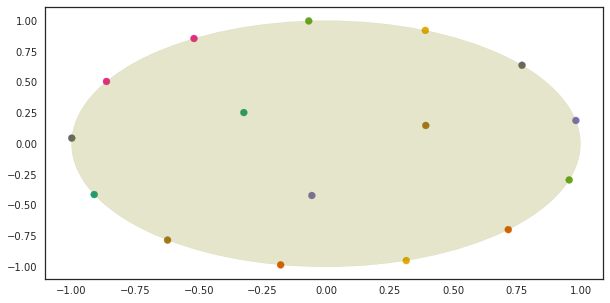

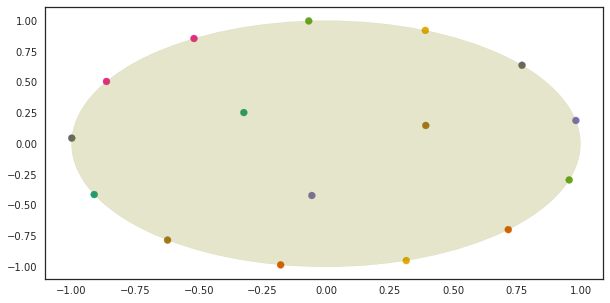

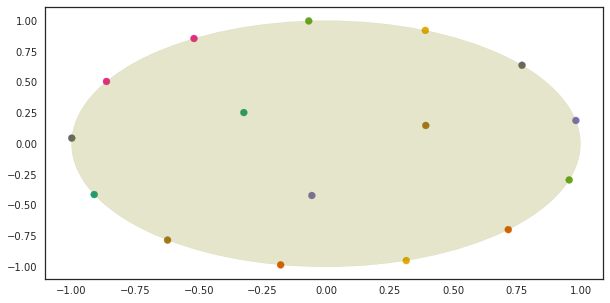

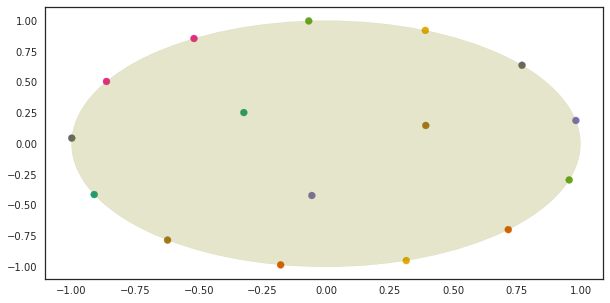

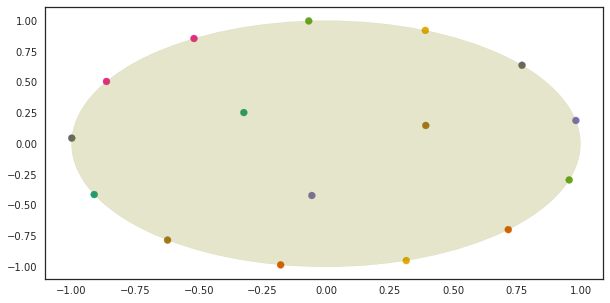

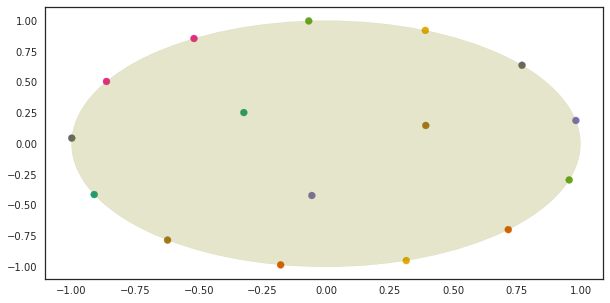

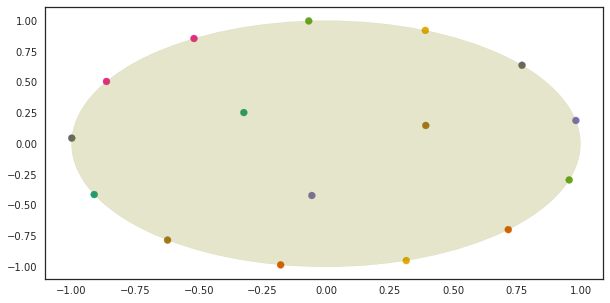

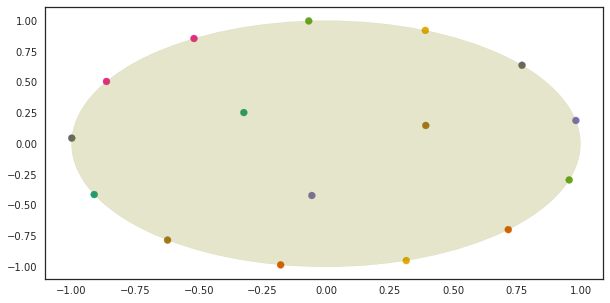

In [ ]:
def showPlot(i=0):
    ax = plot(coordListListList[j][i])
    return ax



def plot_gif(i):
#     print(coordListListList)
#     print(coordListListList[0])
#     print(coordListListList[0][i])
    fig, ax = plt.subplots(figsize=(10,5))
    
    plt.rcParams['figure.figsize'] = [10, 10]
    sns.set()
    sns.set_style("white")
    colors = list(range(len(coordList)))
    ax.scatter(coordList[:, 0], coordList[:, 1], c=colors, cmap='Dark2')
    circle1 = plt.Circle((0, 0), radius, alpha=0.2, color="olive")
    ax.add_artist(circle1)

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    return image

# image = plot_gif(0);

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('/home/lennart/Documenten/2018-2019/stochastic simulations/StochasticSim/Lennart/Opd 3/', [plot_gif(i) for i in range(len(coordListListList[0]))], fps=1)

In [7]:
from scipy.spatial import distance_matrix
distance_matrix([[0,0],[0,1], [1, 1]], [[0,0],[0,1], [1, 1]])

array([[0.        , 1.        , 1.41421356],
       [1.        , 0.        , 1.        ],
       [1.41421356, 1.        , 0.        ]])